In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

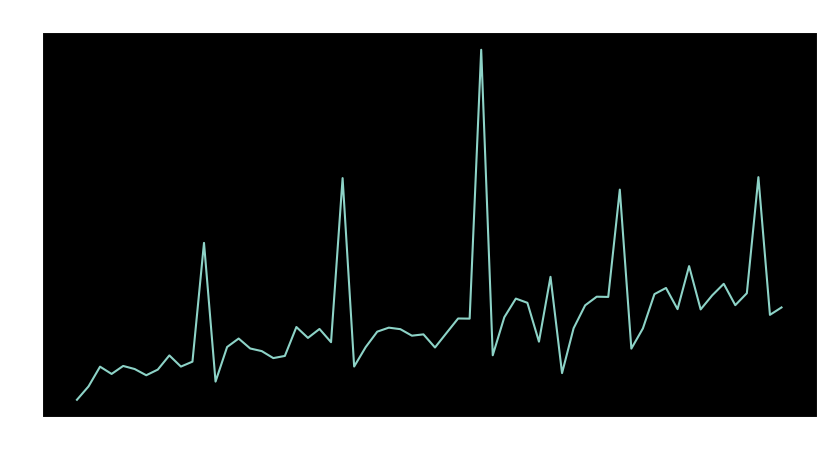

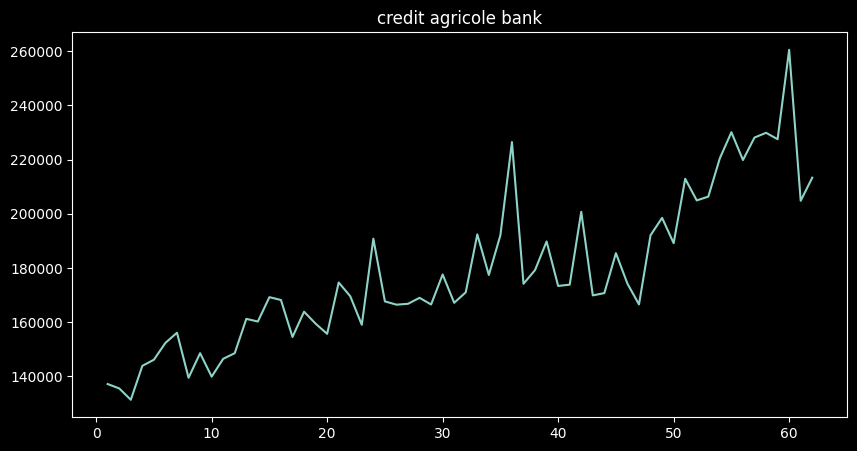

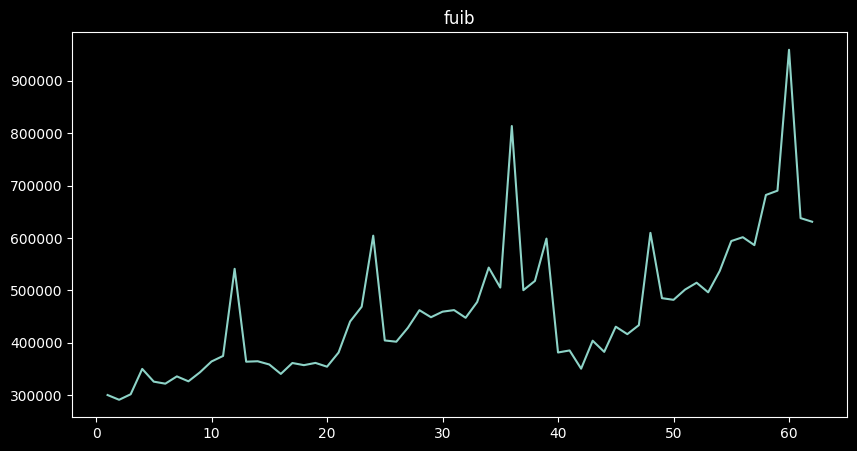

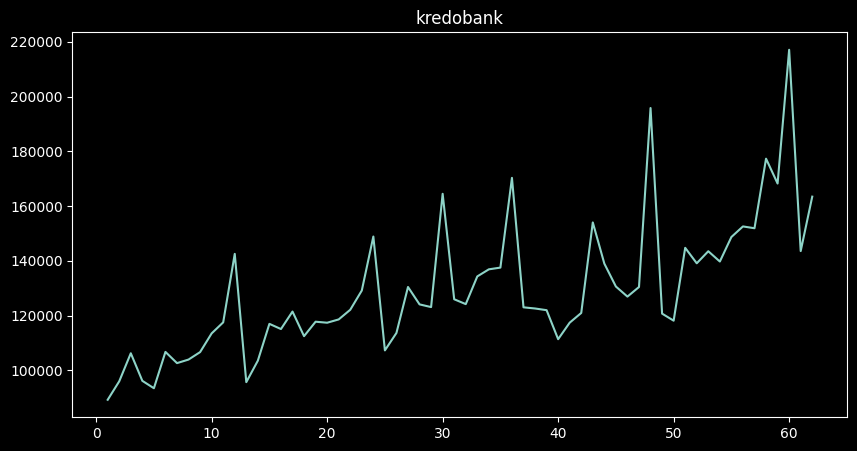

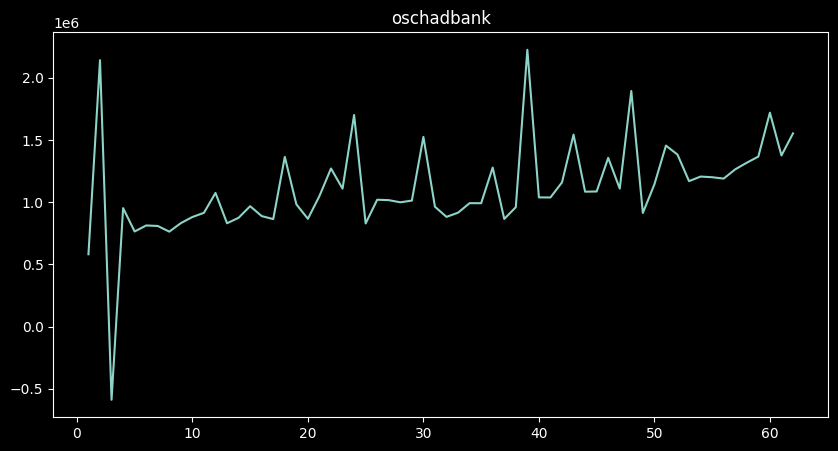

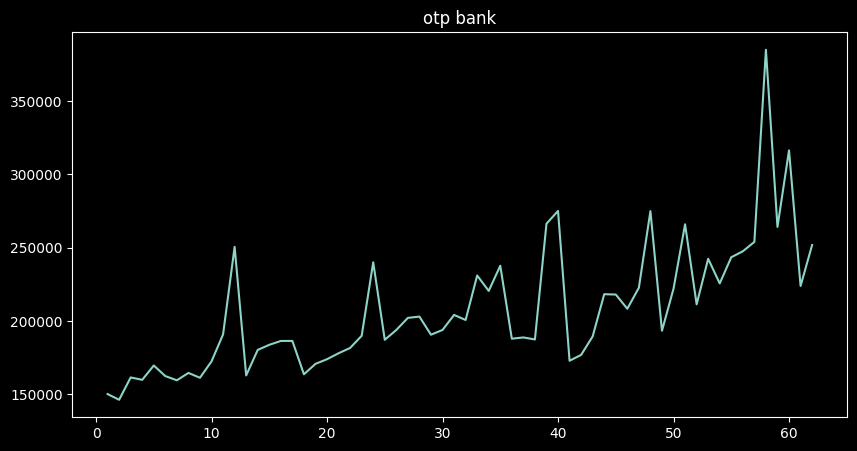

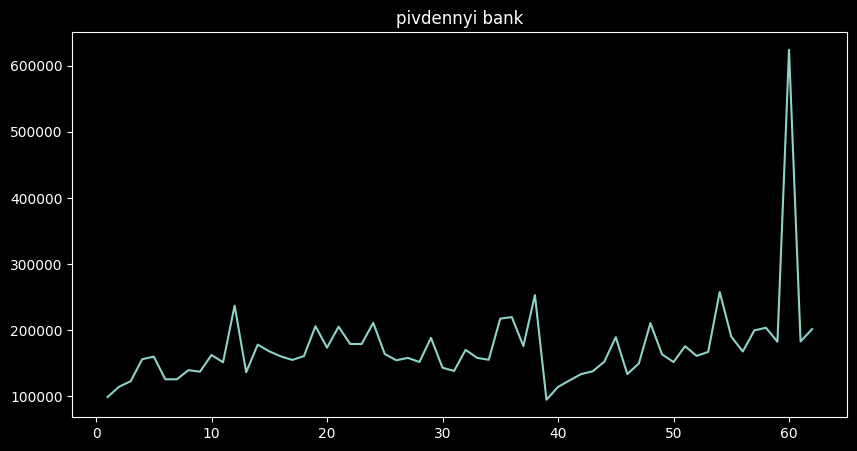

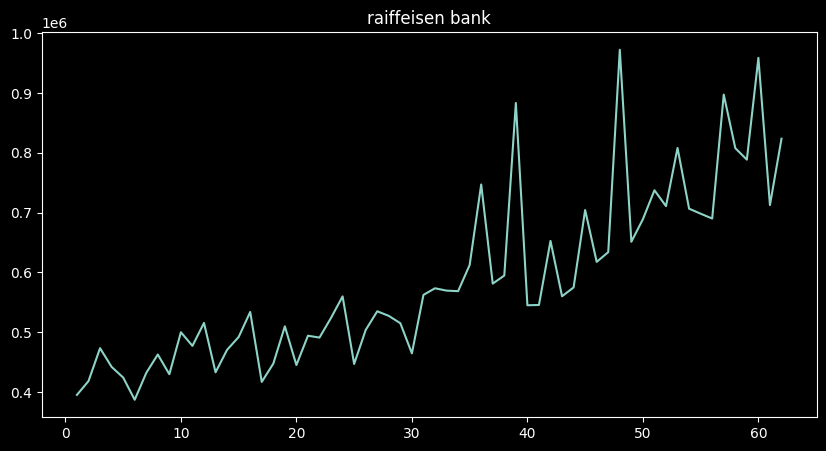

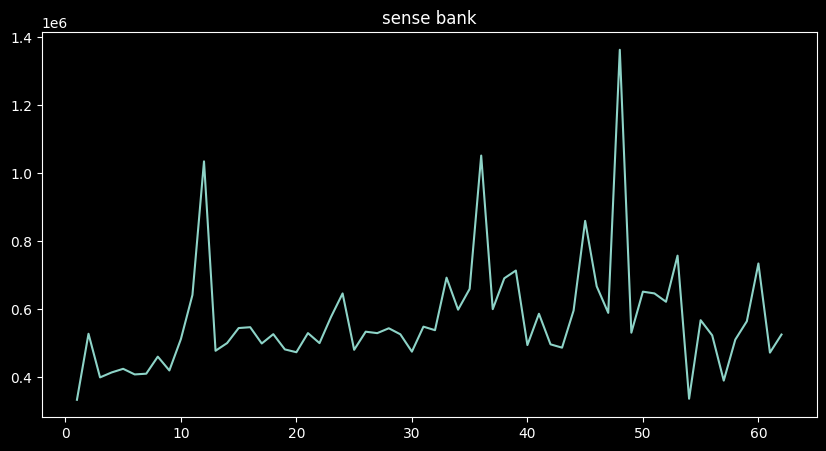

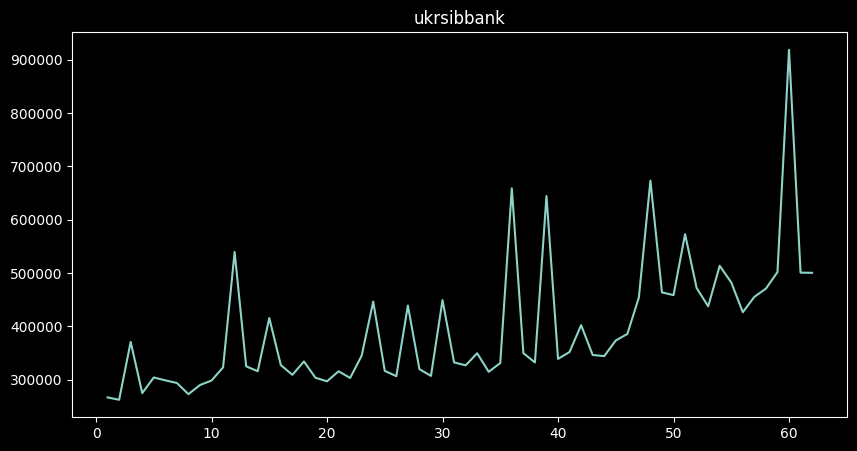

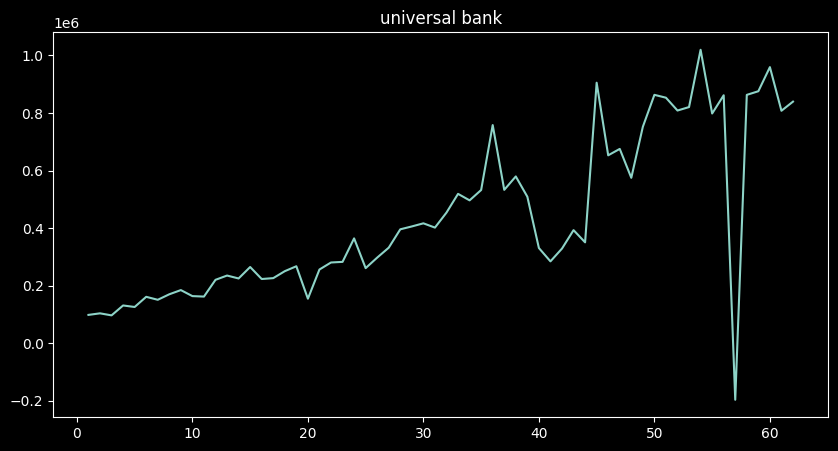

In [2]:
def differenced_data(files, banks):
    for name in files:
        df=pd.read_csv('selected_banks/'+name)
        for bank in banks:
            differ = []
            for i in range(1,len(df[bank])):
                # print(df[bank][i]-df[bank][i-1]*(i%12!=1), i)
                differ.append(df[bank][i]-df[bank][i-1]*(i%12!=1))
            plt.figure(figsize=(10, 5))
            plt.style.use('dark_background')
            plt.title(bank)
            plt.plot([i for i in range(1,len(df[bank]))],differ)
            plt.show()
differenced_data(['AE_sel.csv'],['cb privatbank', 'credit agricole bank', 'fuib', 'kredobank', 'oschadbank', 'otp bank', 'pivdennyi bank', 'raiffeisen bank', 'sense bank', 'ukrsibbank', 'universal bank'])

# Plots for all

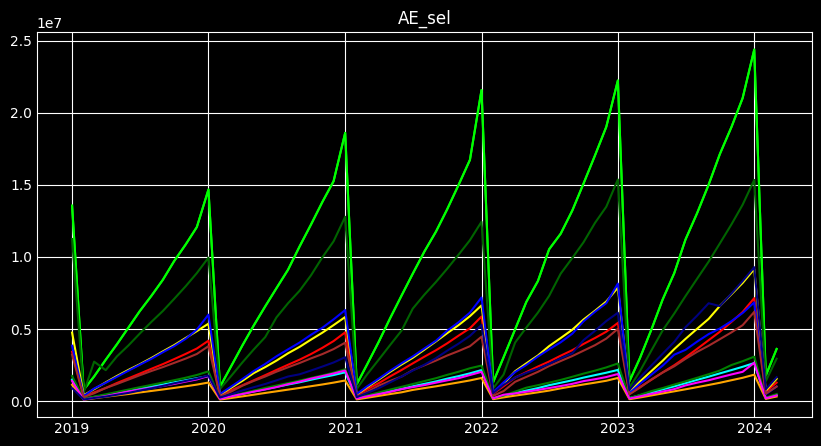

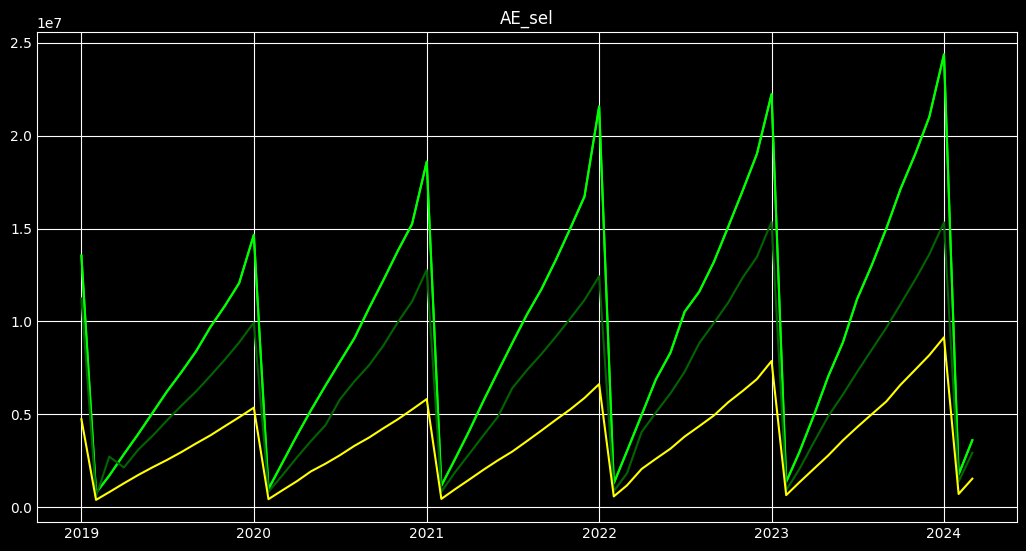

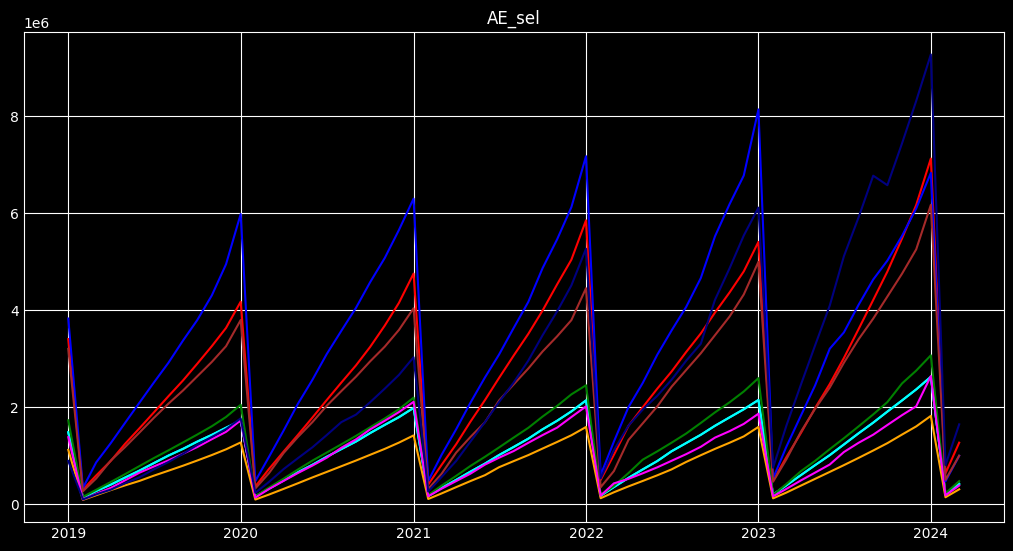

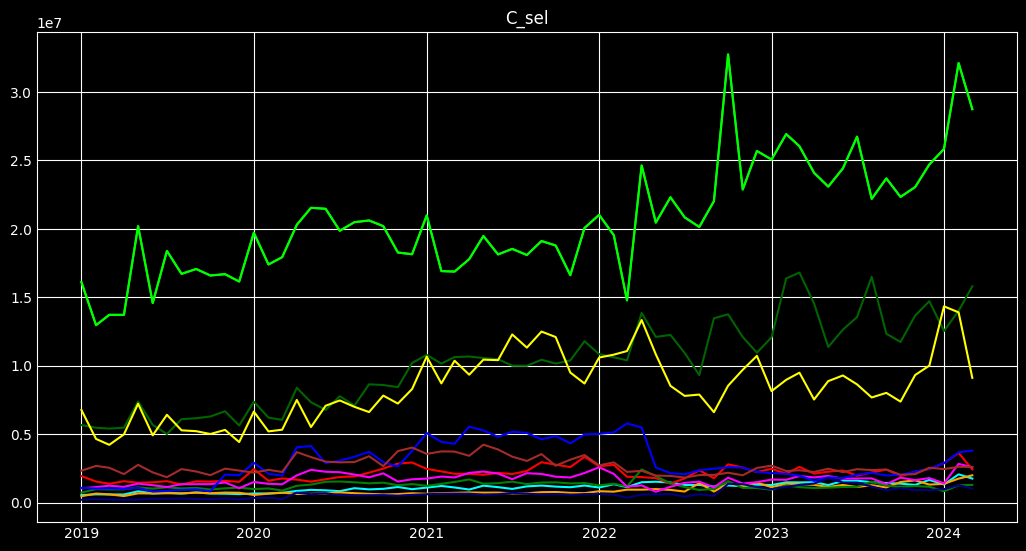

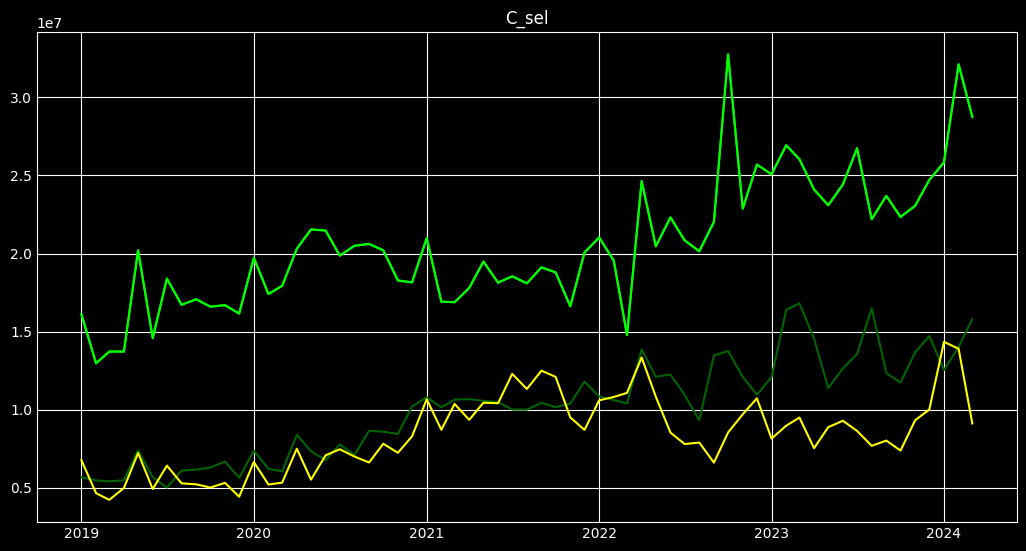

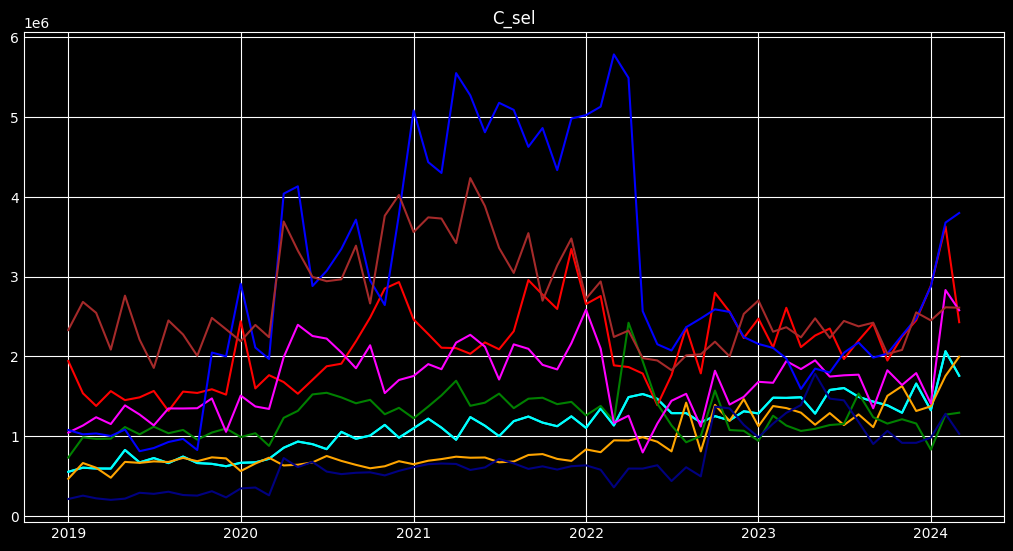

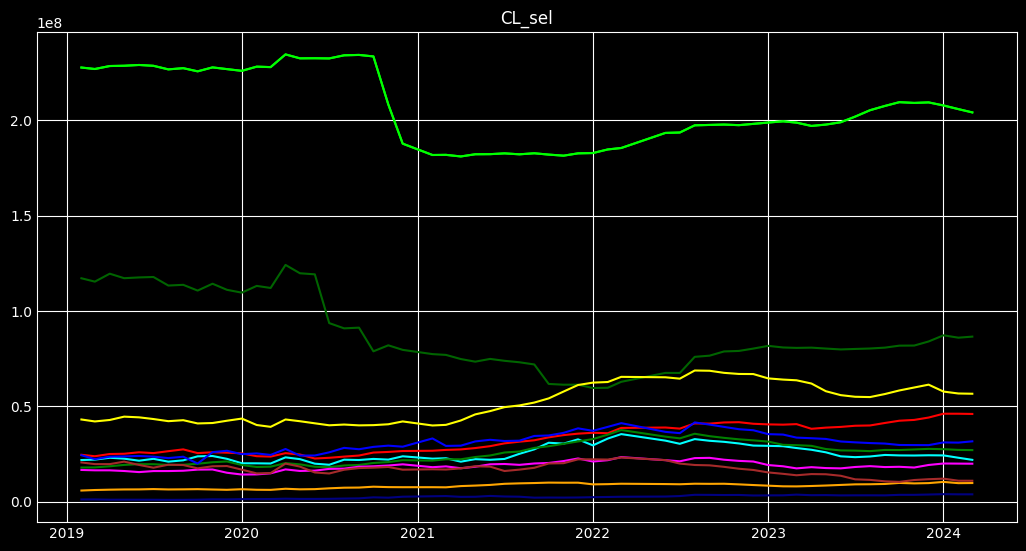

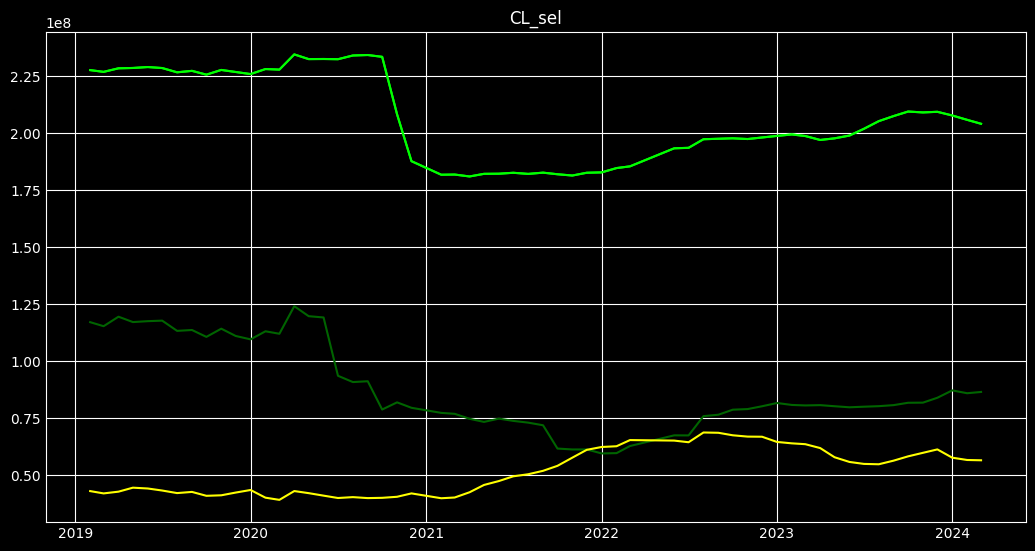

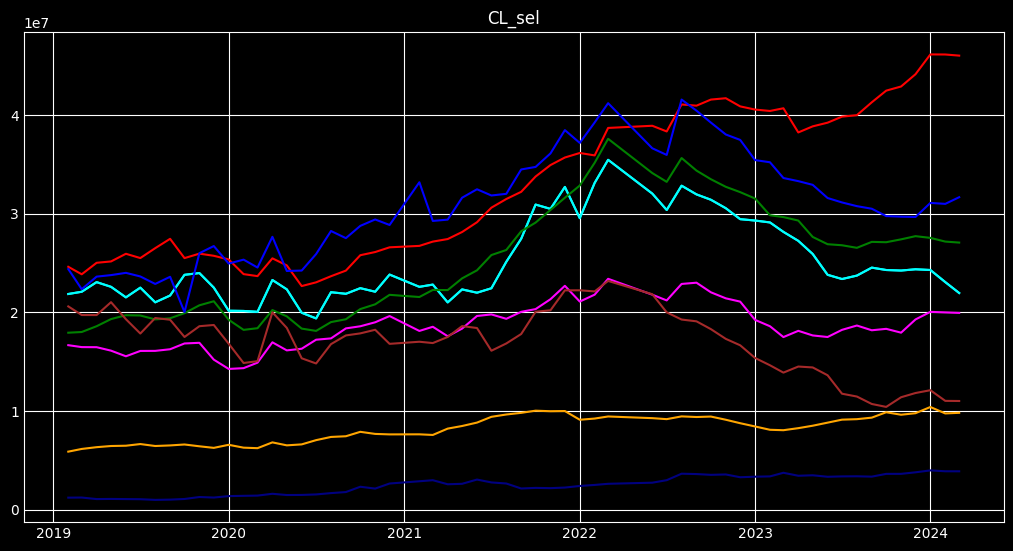

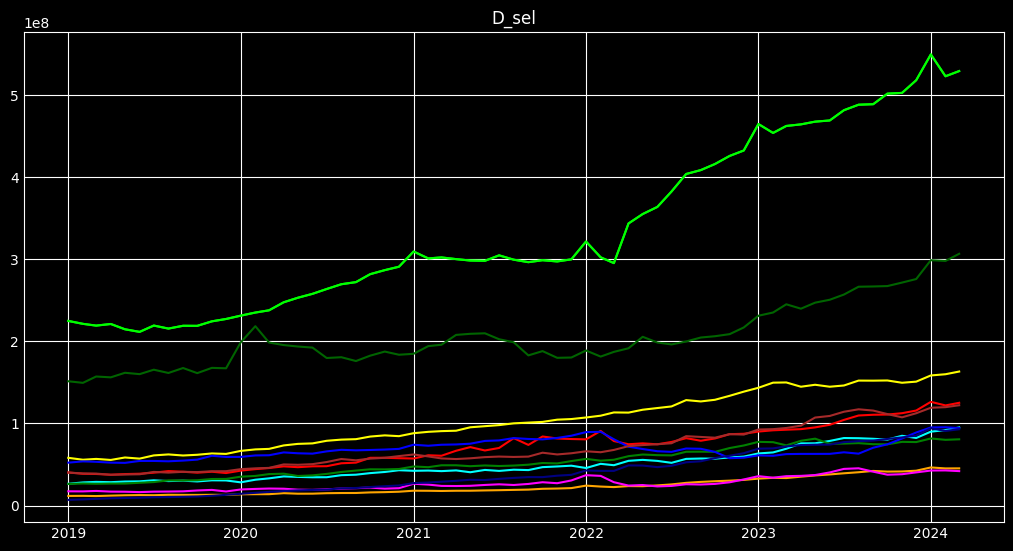

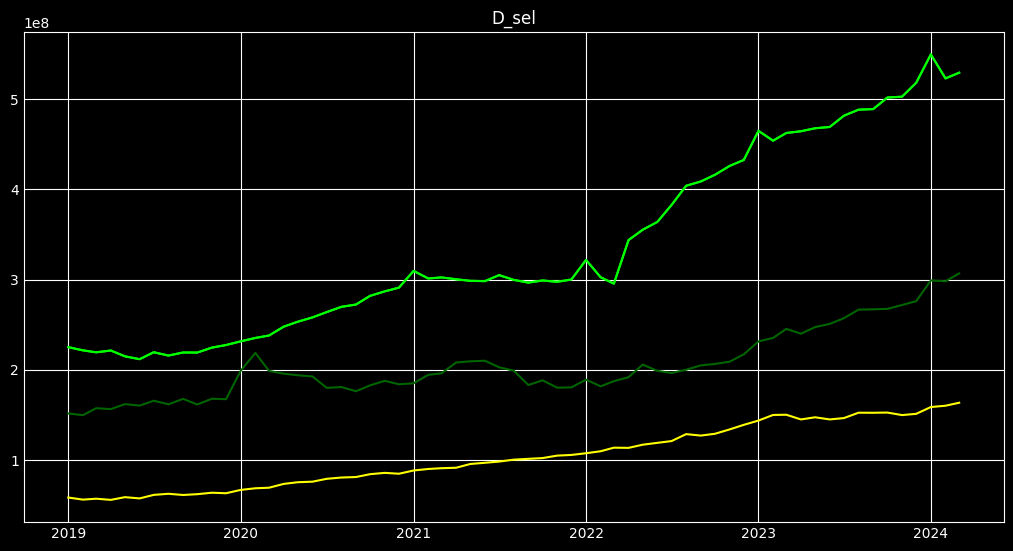

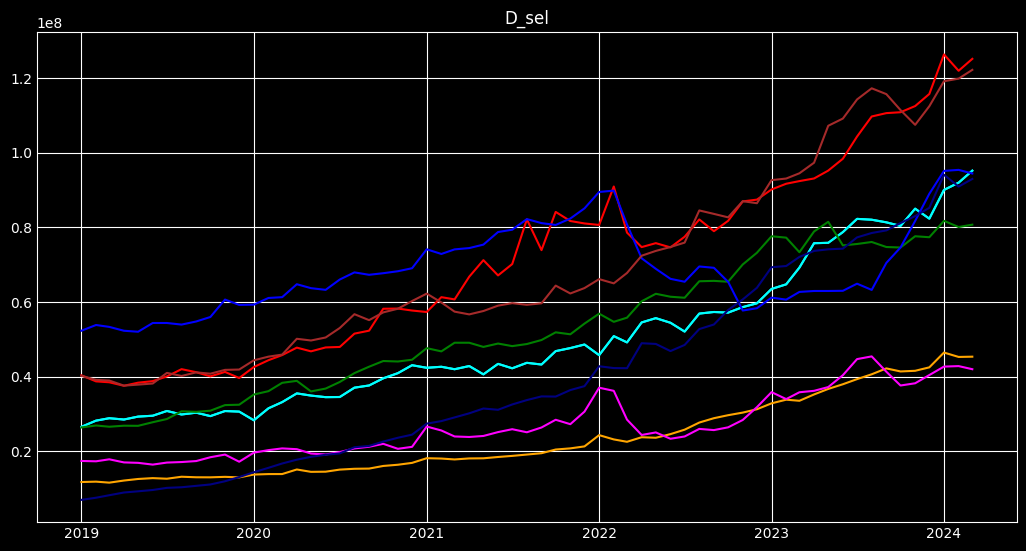

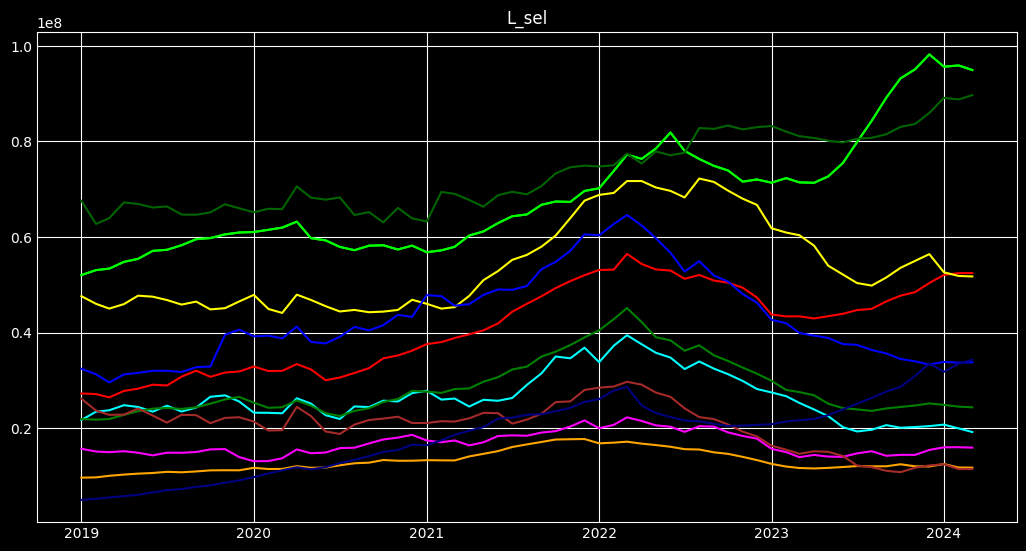

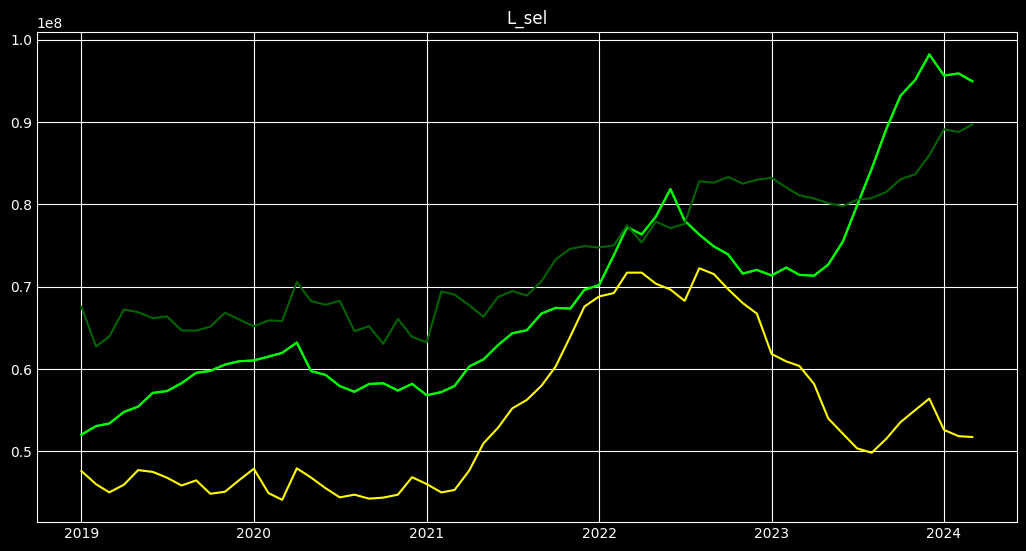

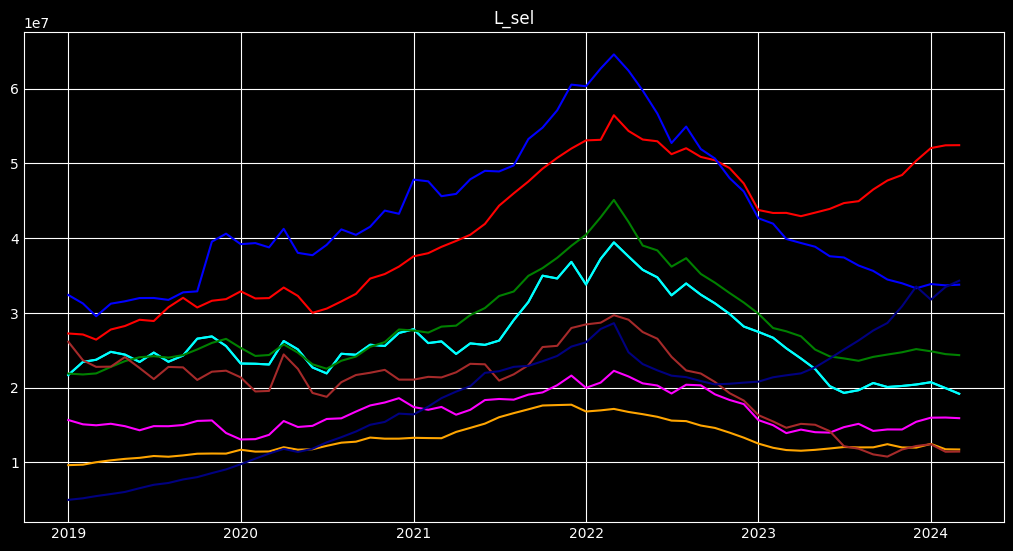

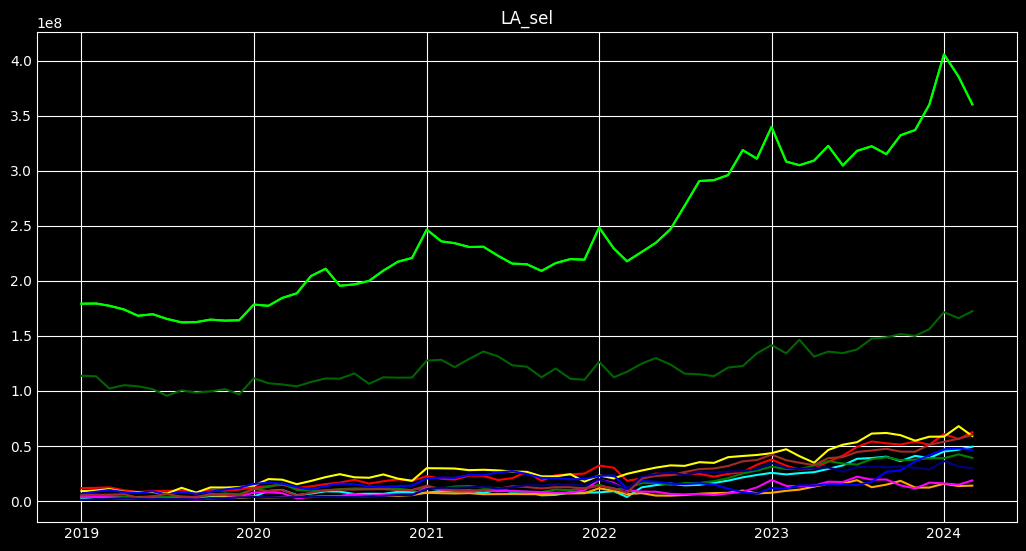

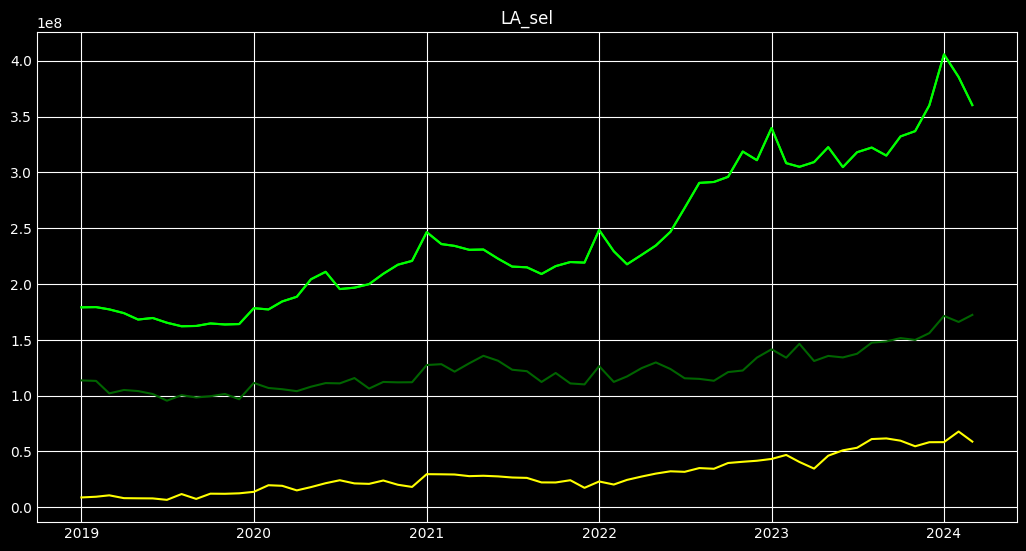

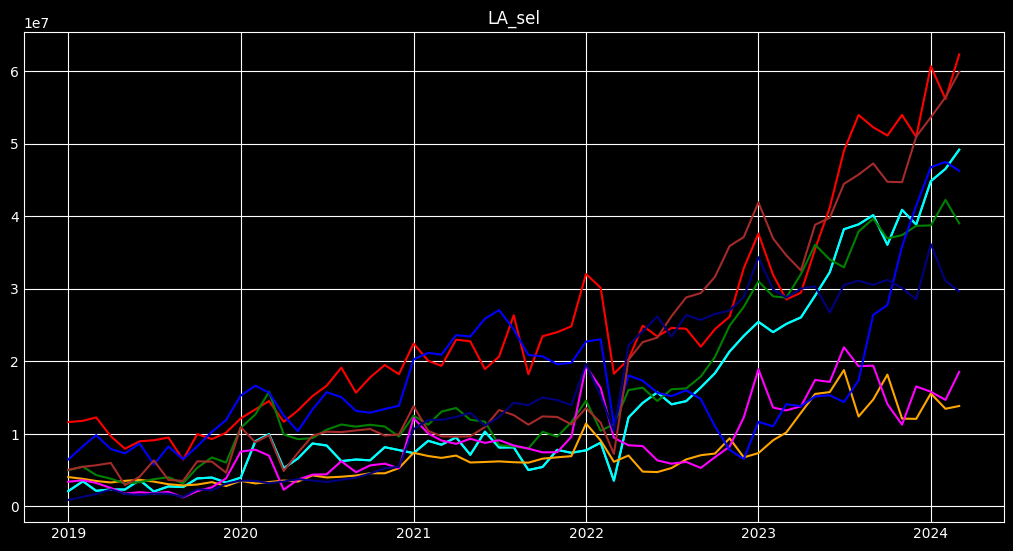

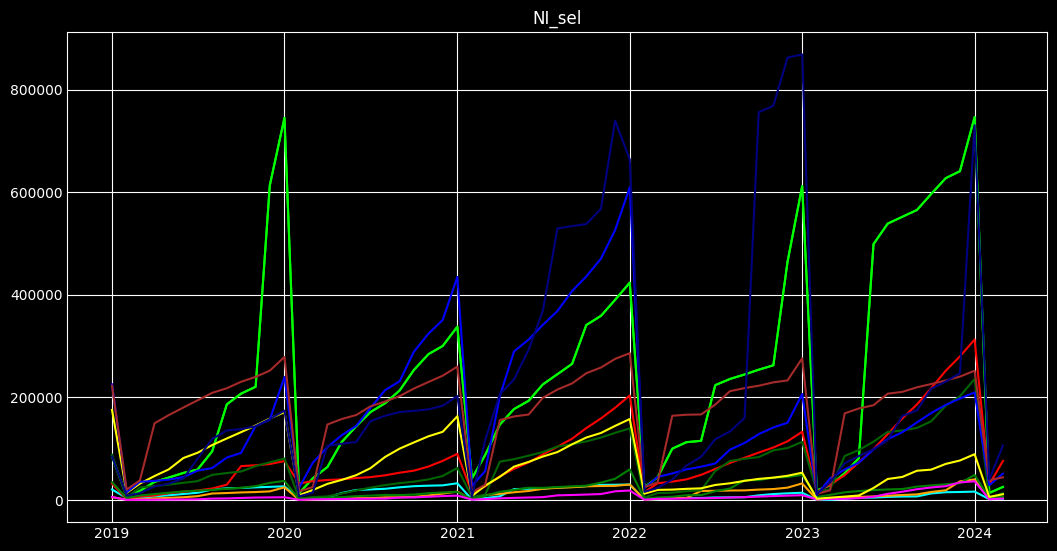

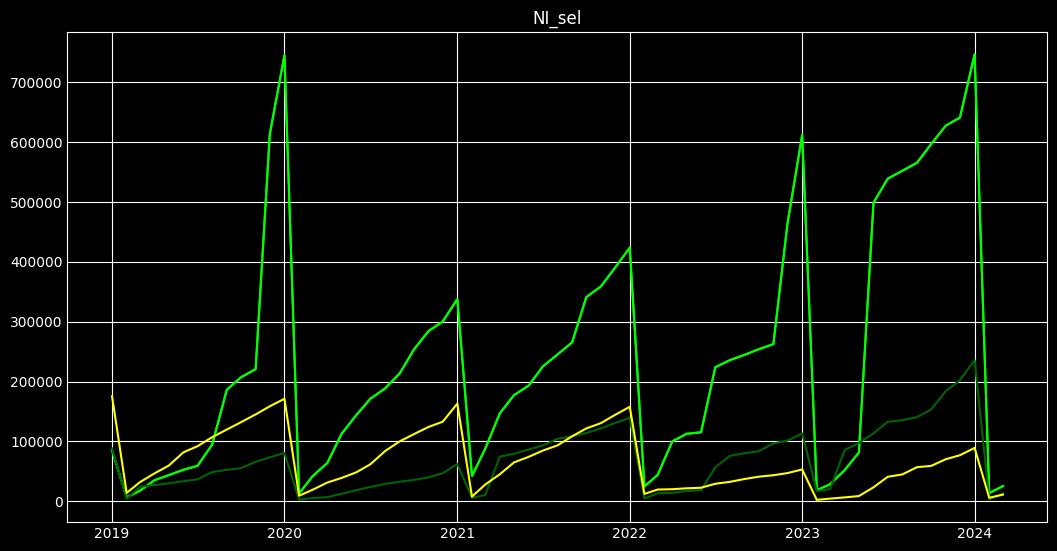

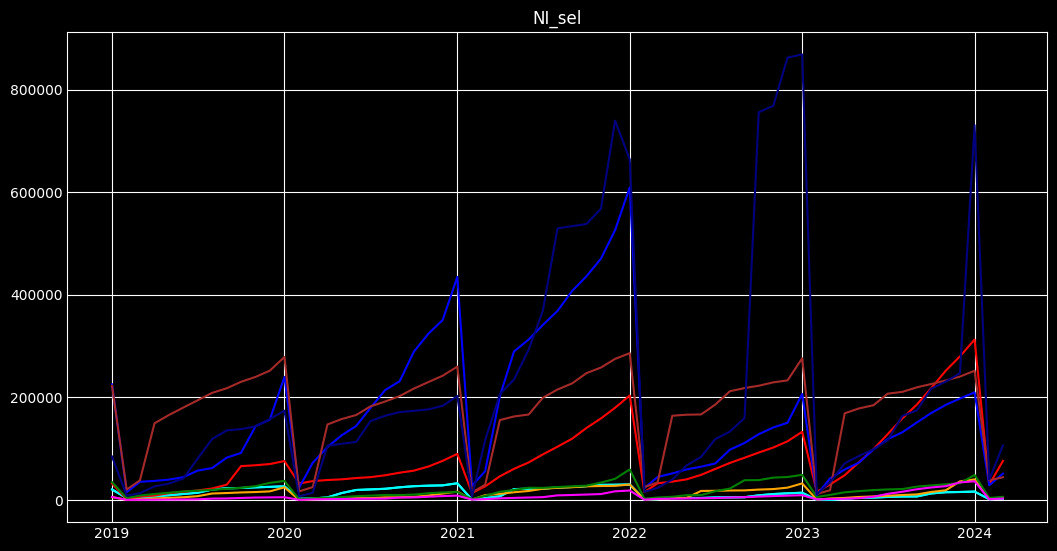

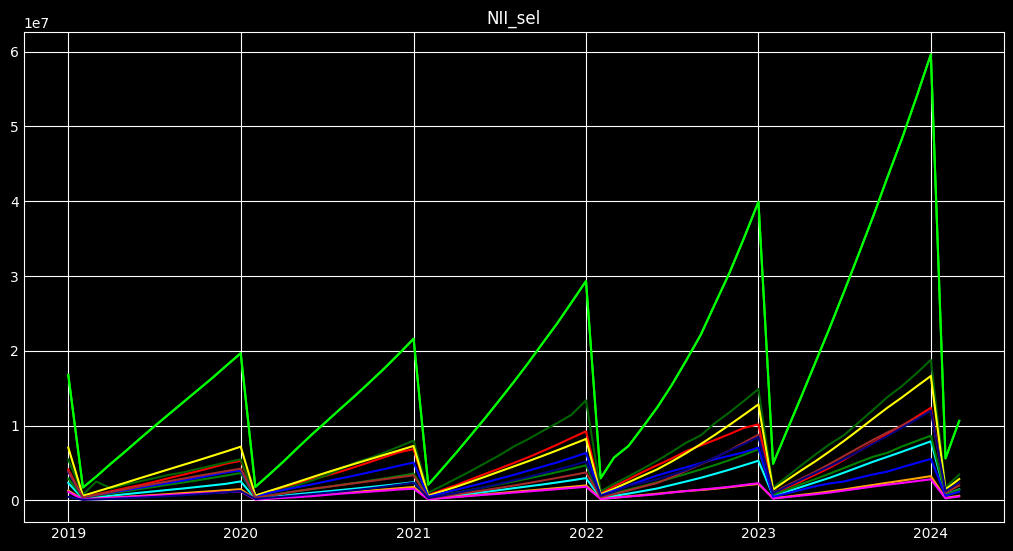

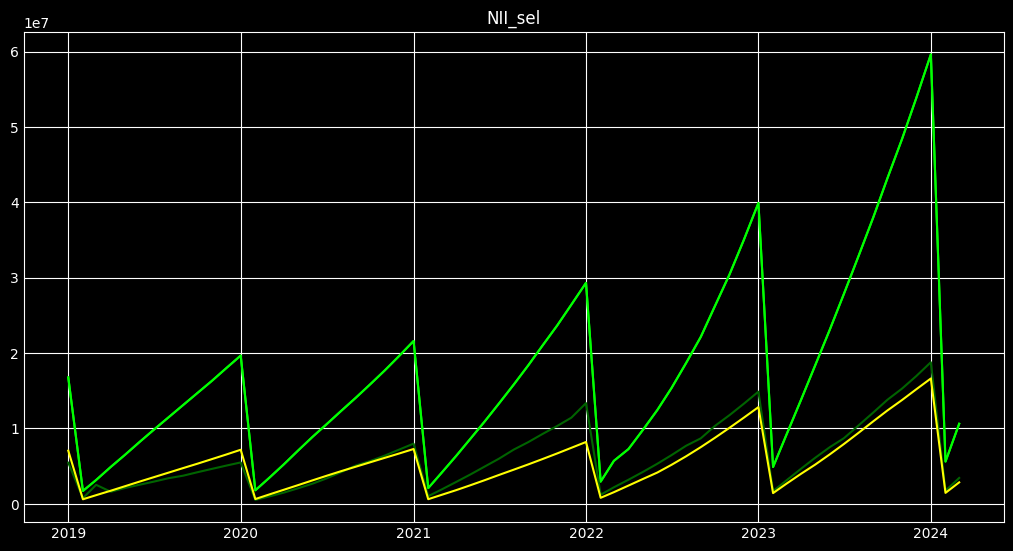

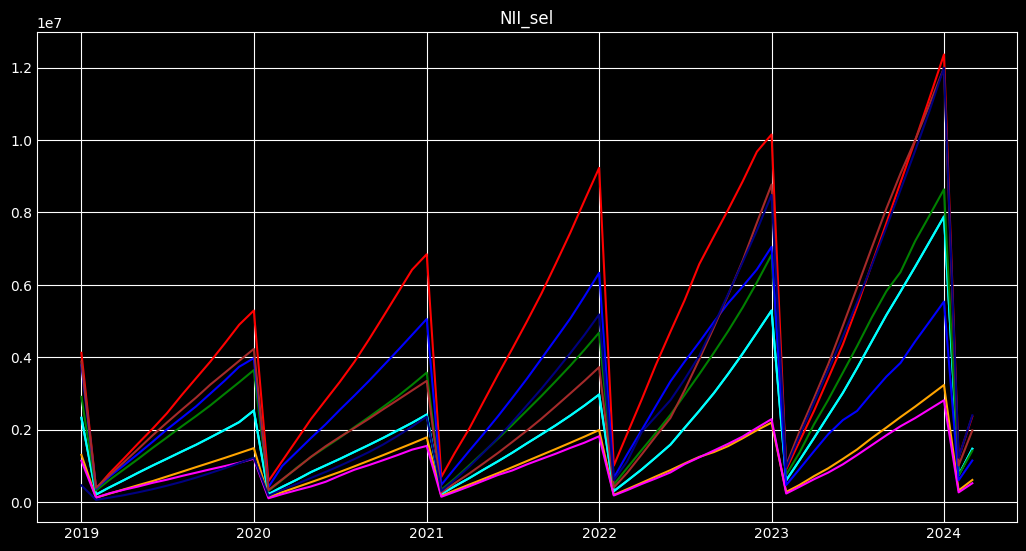

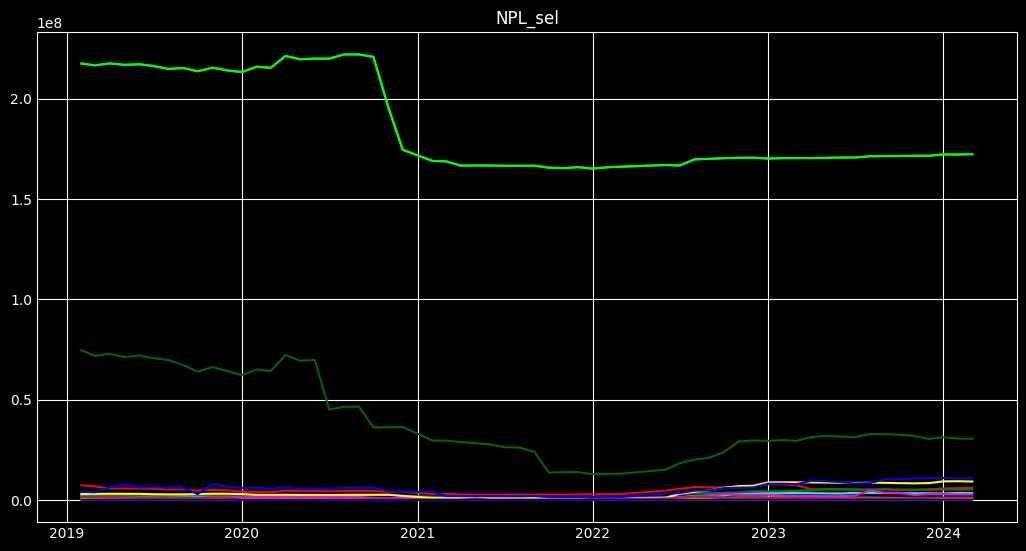

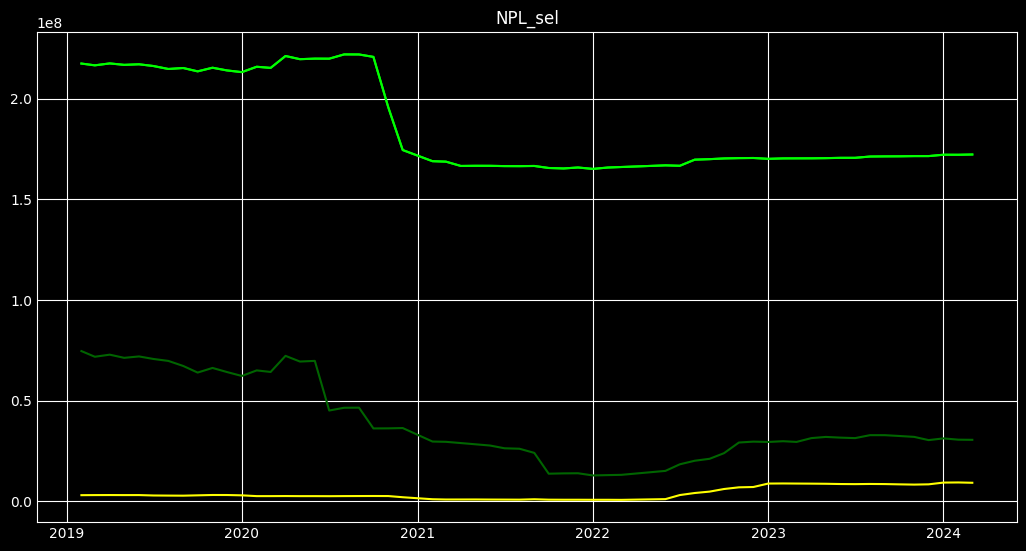

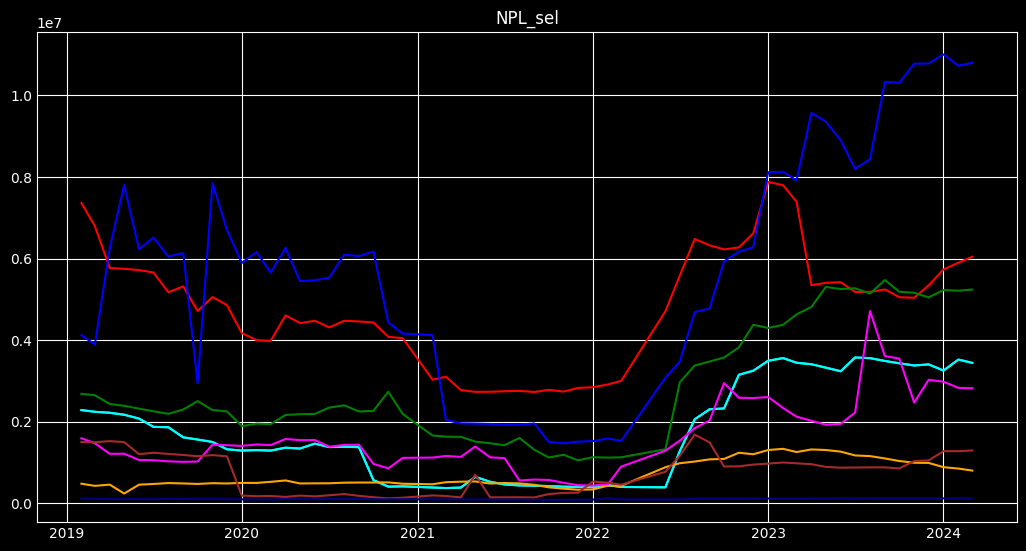

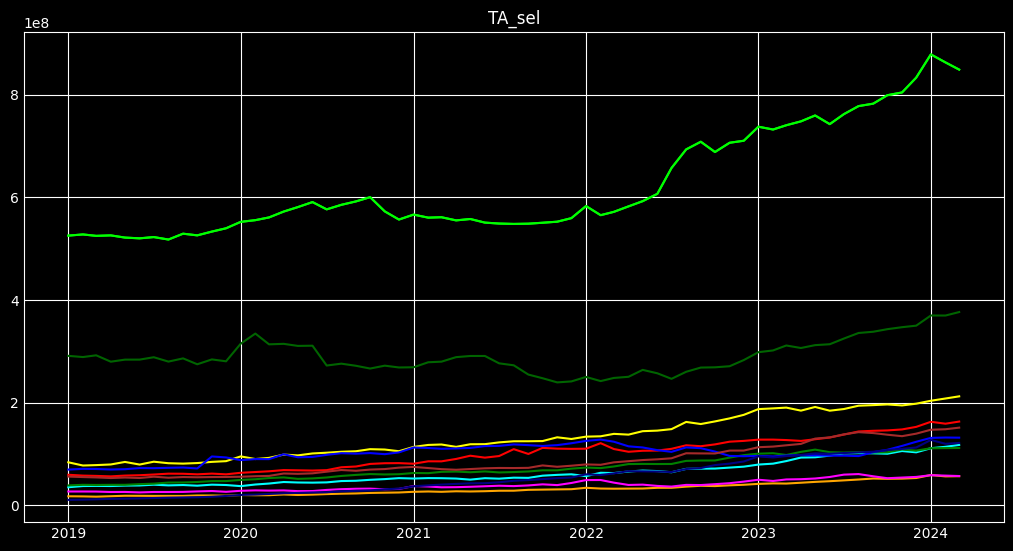

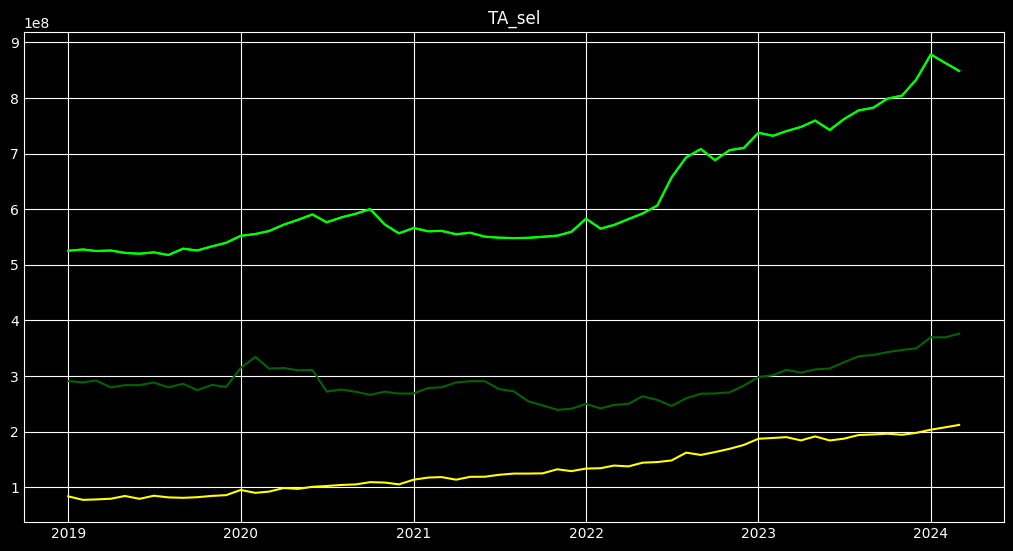

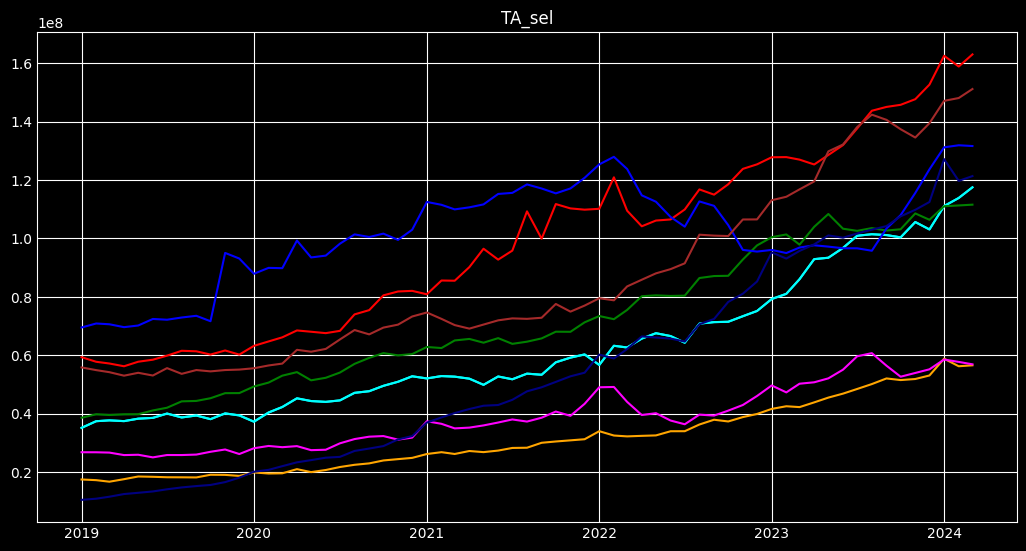

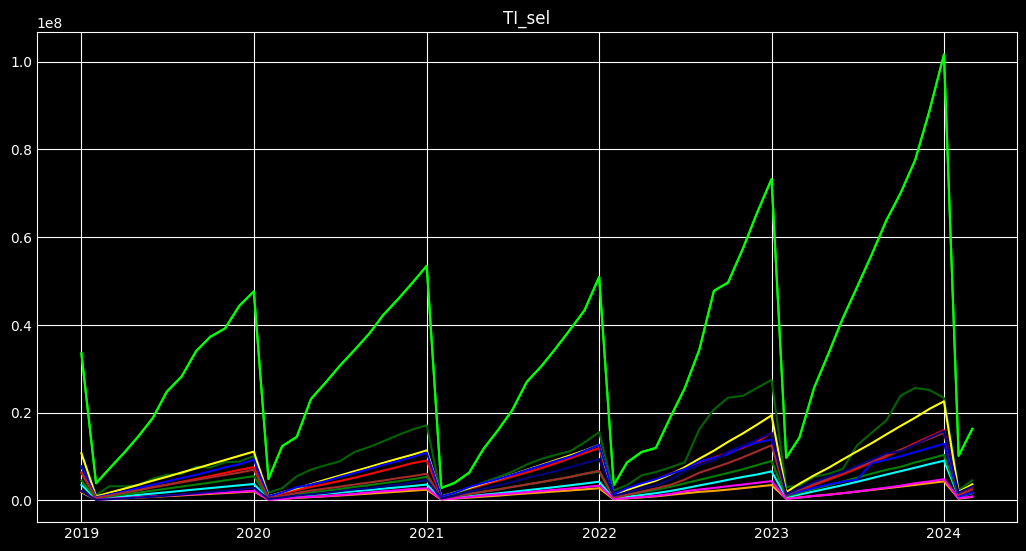

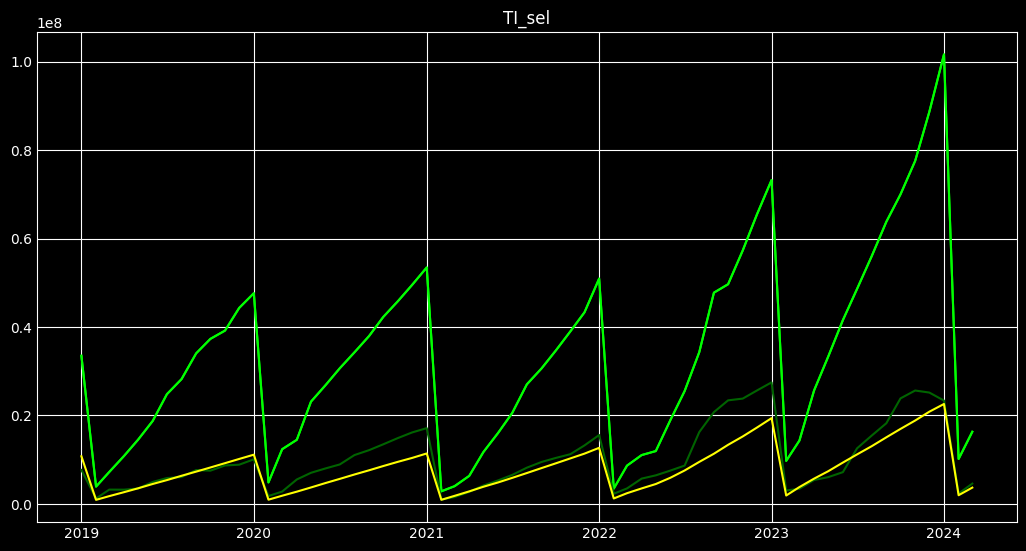

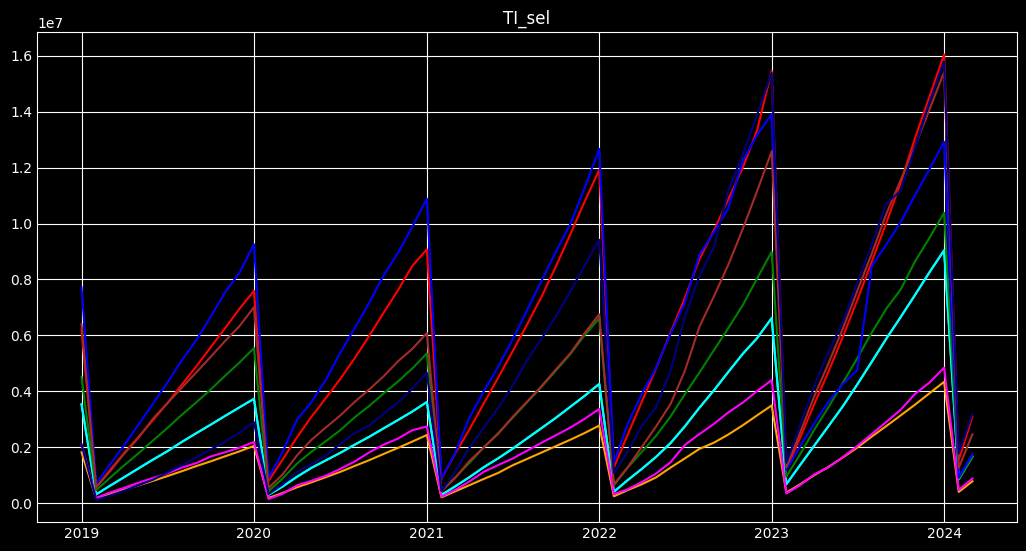

In [3]:
def plot_file(name, sel_banks):
    df=pd.read_csv('selected_banks/'+name)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    plt.figure(figsize=(10, 5))
    plt.style.use('_mpl-gallery')
    plt.title(os.path.splitext(name)[0])
    plt.plot(df.index, df[sel_banks[0][0]], color=sel_banks[0][1])
    for bank in sel_banks:
        plt.plot(df[bank[0]], color = bank[1])
    plt.show()
    
all_banks = [['cb privatbank', 'lime'], ['credit agricole bank', 'cyan'], ['fuib','red'], ['kredobank', 'orange'], ['oschadbank', 'darkgreen'], ['otp bank', 'green'], ['pivdennyi bank', 'magenta'], ['raiffeisen bank', 'yellow'], ['sense bank', 'blue'], ['ukrsibbank', 'brown'], ['universal bank', 'navy']]
top_banks = [['cb privatbank', 'lime'], ['oschadbank', 'darkgreen'], ['raiffeisen bank', 'yellow']]
lower_banks = [['credit agricole bank', 'cyan'], ['fuib','red'], ['kredobank', 'orange'], ['otp bank', 'green'], ['pivdennyi bank', 'magenta'], ['sense bank', 'blue'], ['ukrsibbank', 'brown'], ['universal bank', 'navy']]

for files in ['AE_sel.csv', 'C_sel.csv', 'CL_sel.csv', 'D_sel.csv', 'L_sel.csv', 'LA_sel.csv', 'NI_sel.csv', 'NII_sel.csv','NPL_sel.csv', 'TA_sel.csv', 'TI_sel.csv']:
    plot_file(files, all_banks)
    plot_file(files, top_banks)
    plot_file(files, lower_banks)


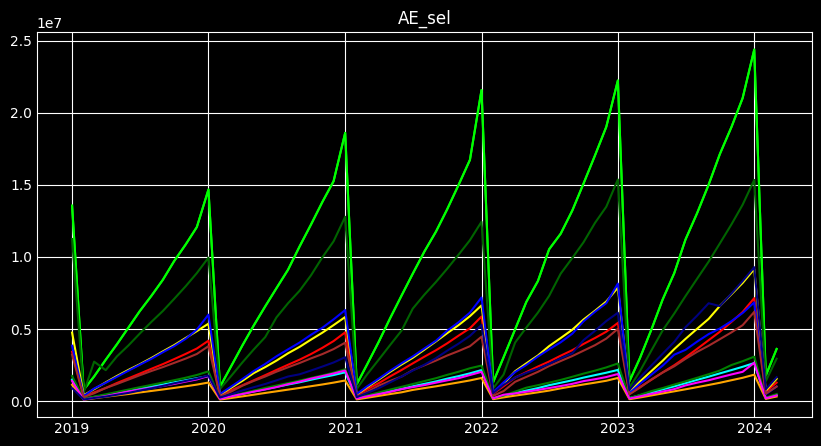

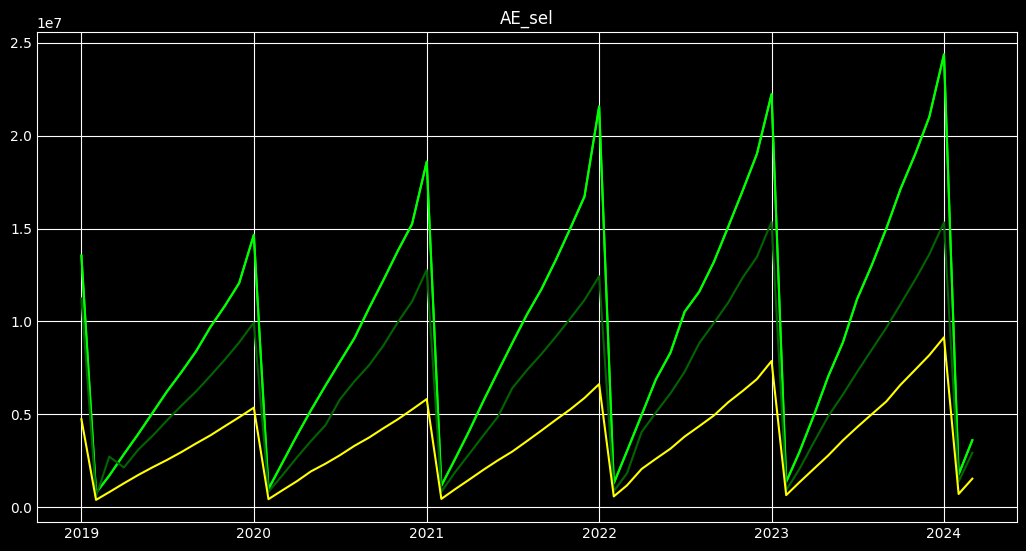

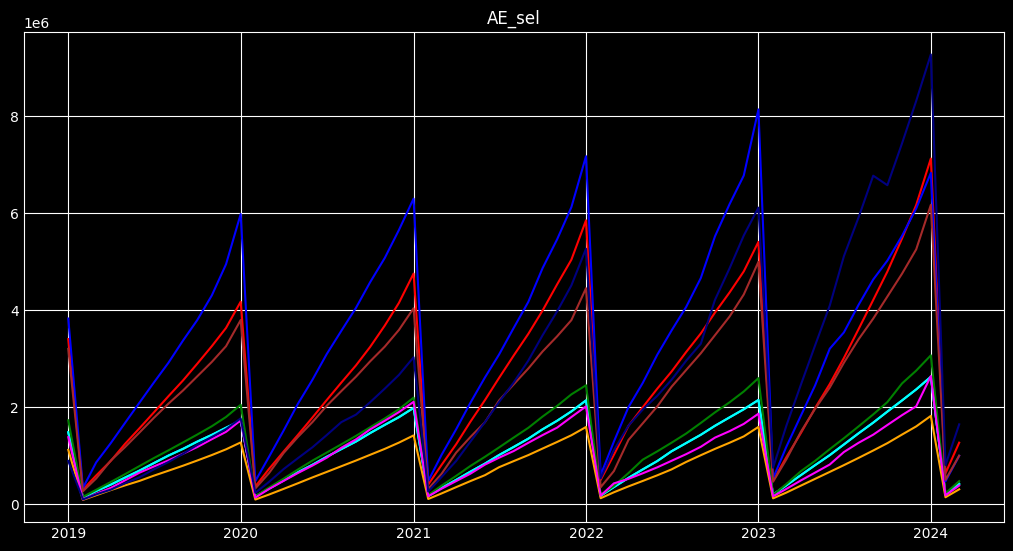

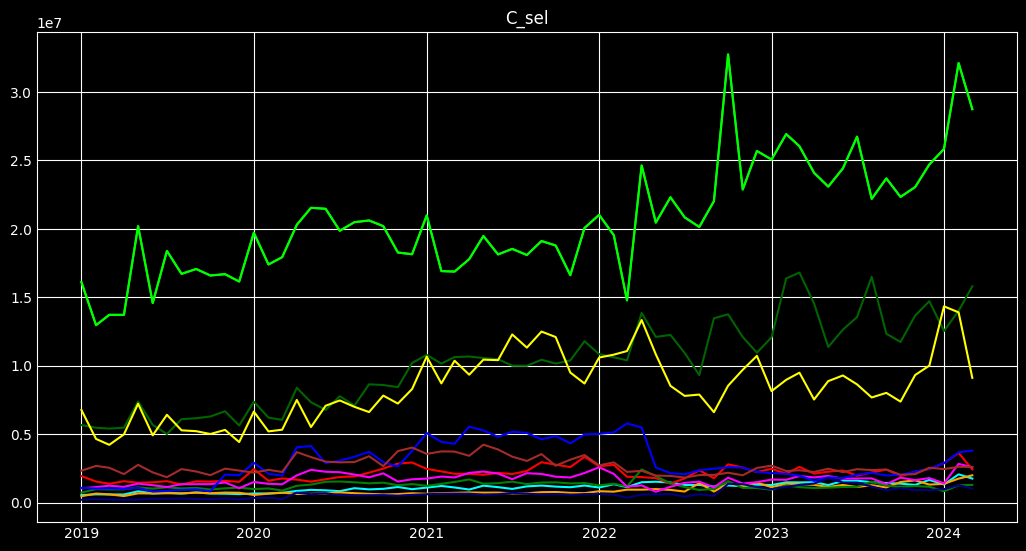

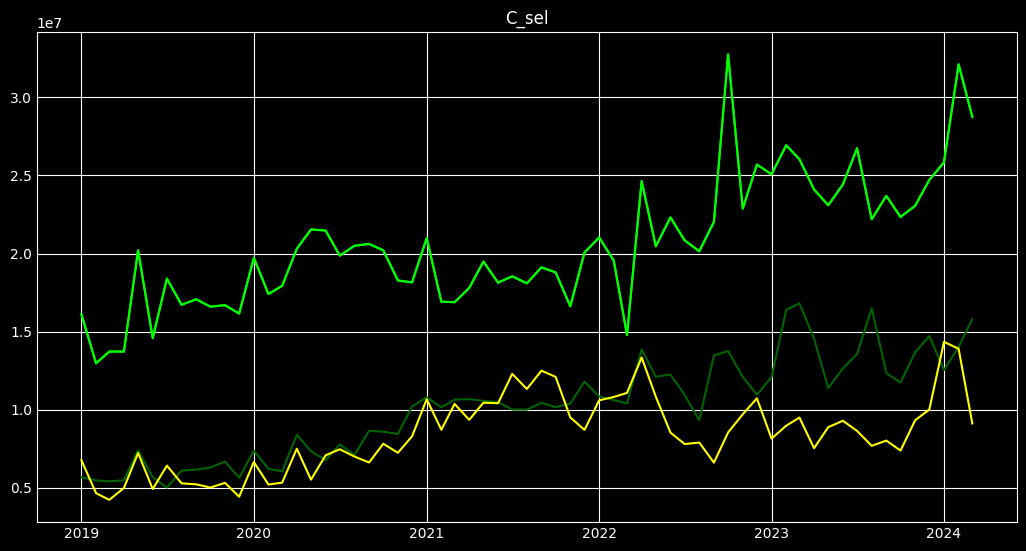

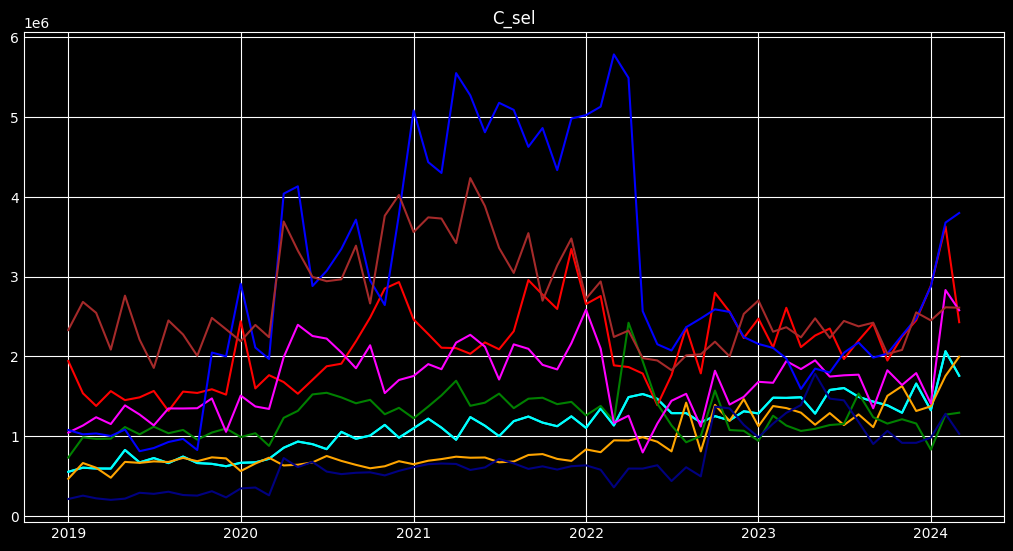

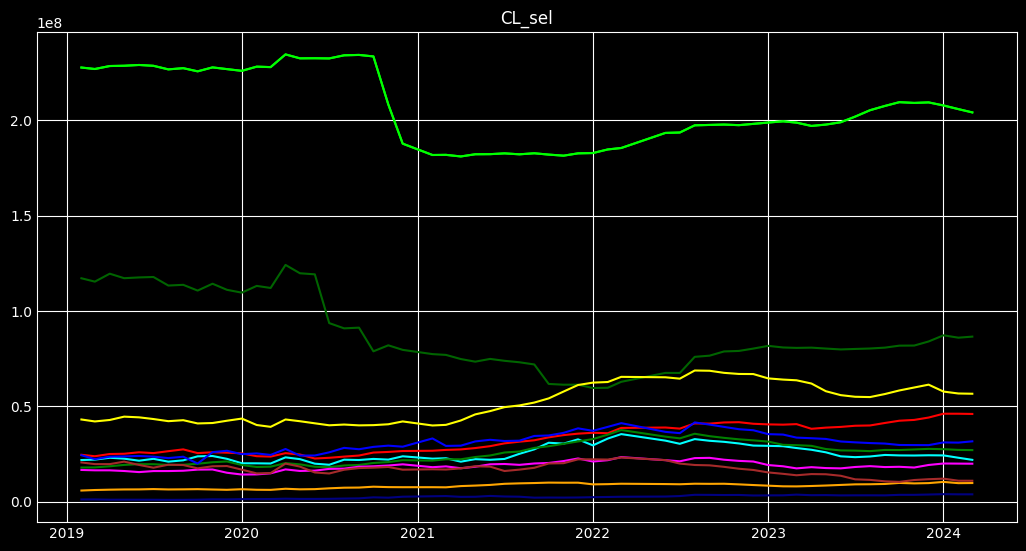

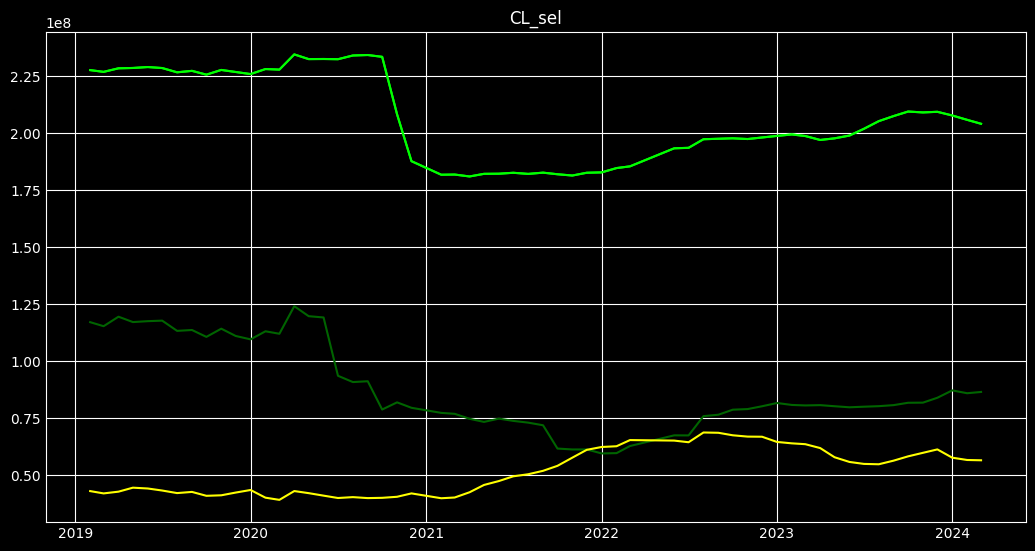

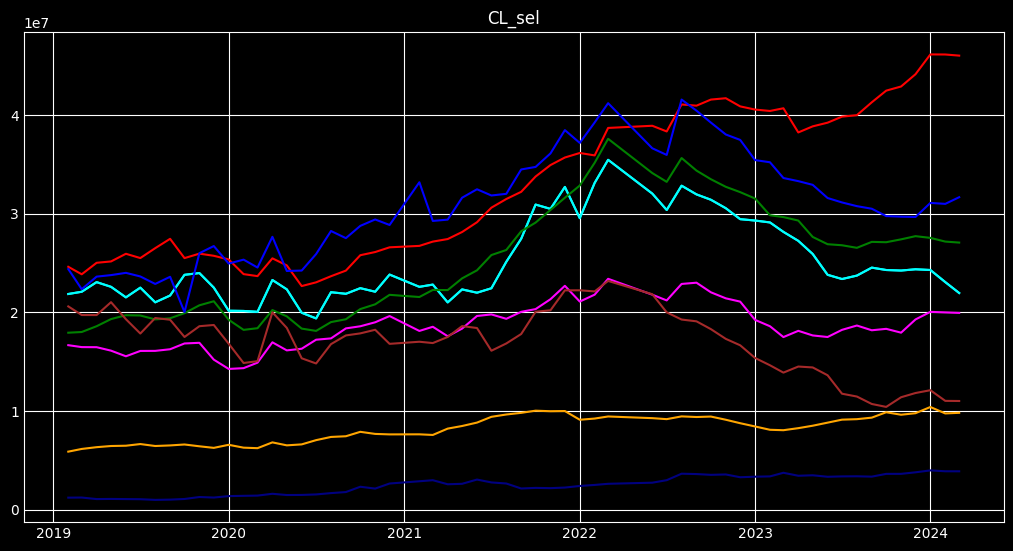

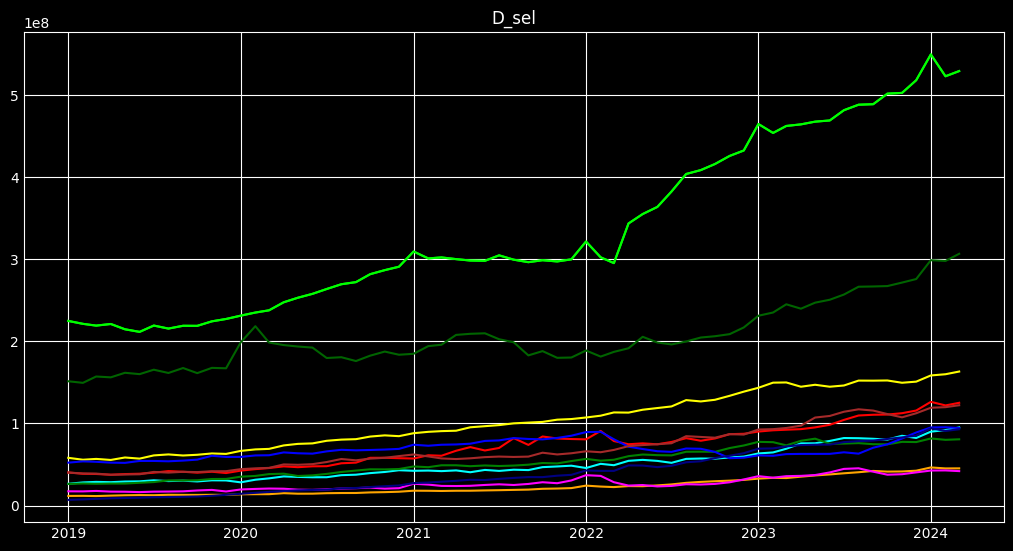

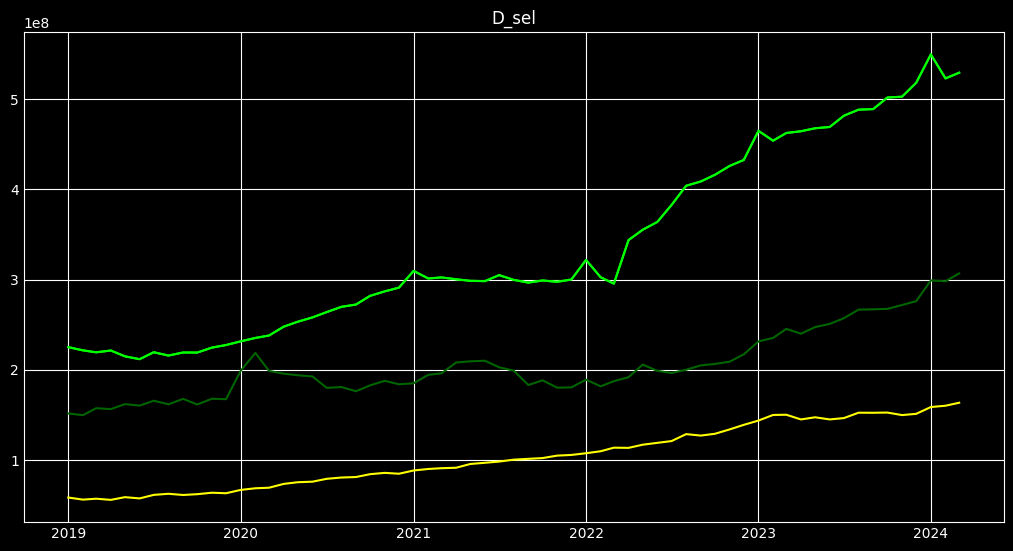

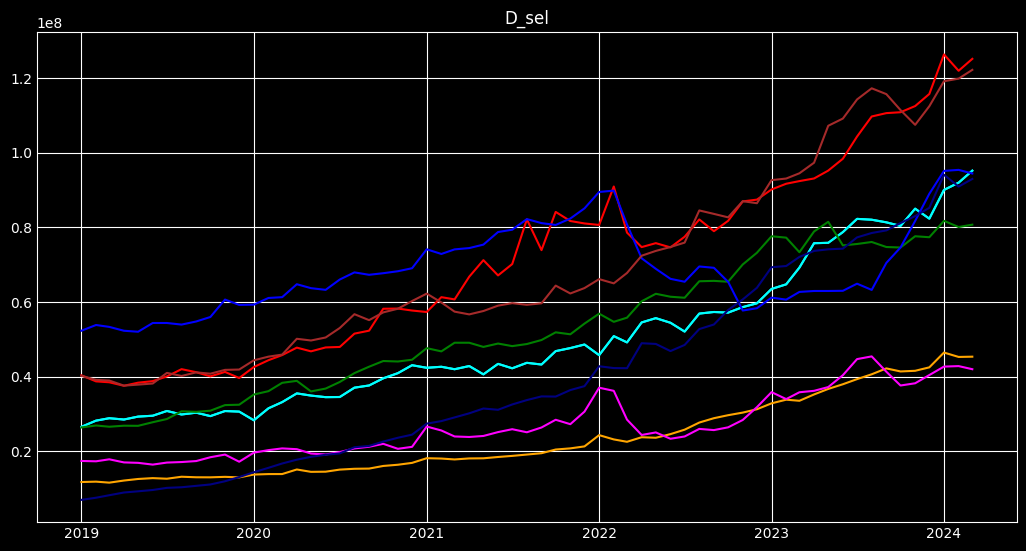

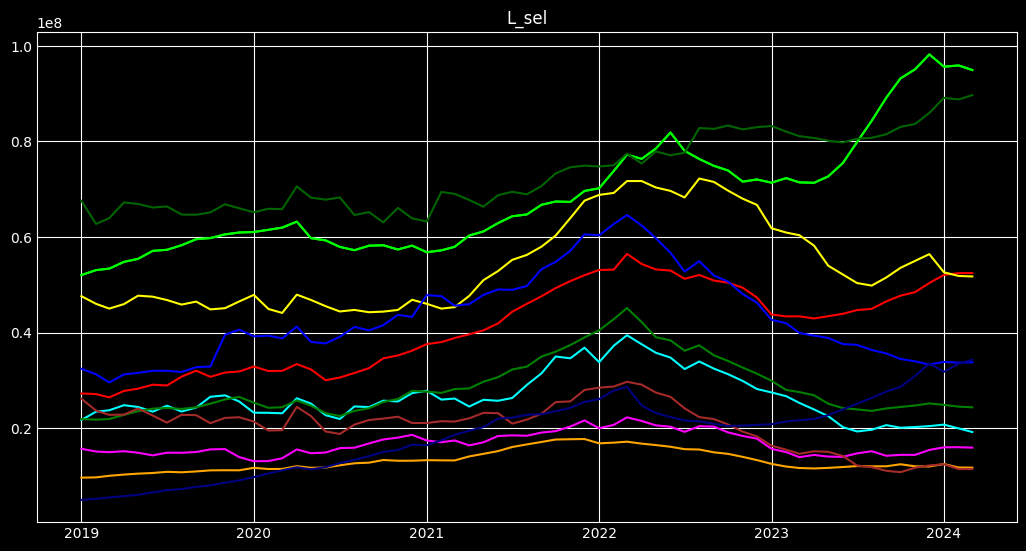

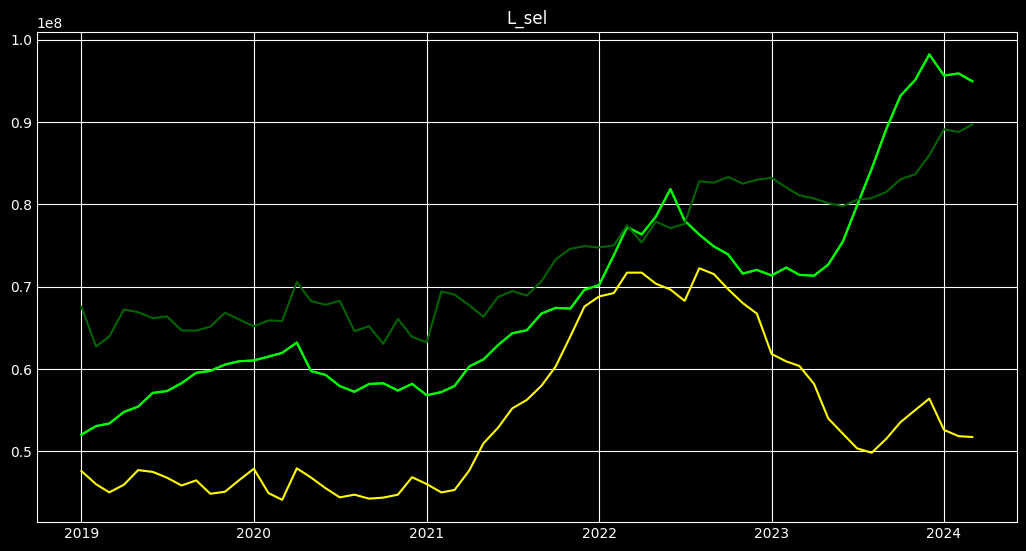

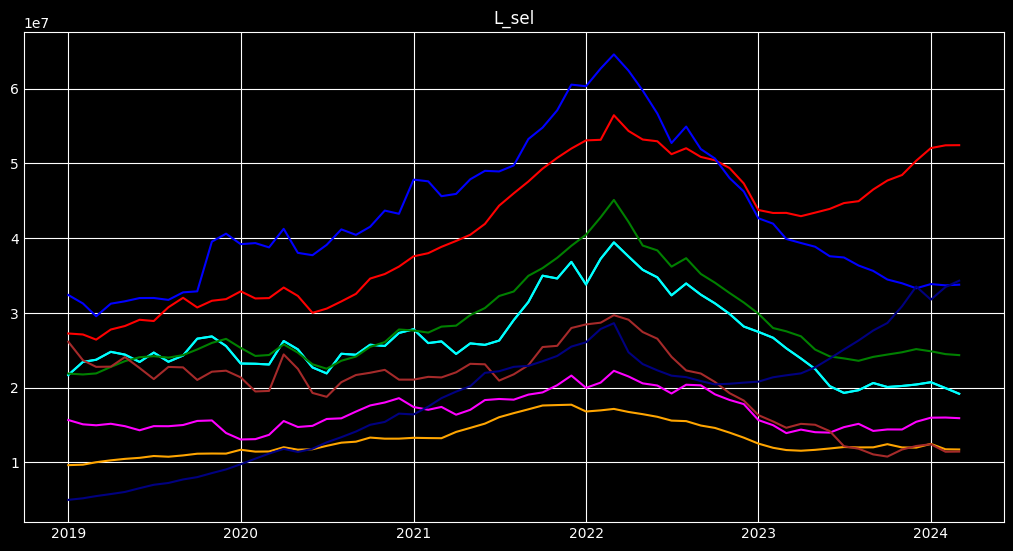

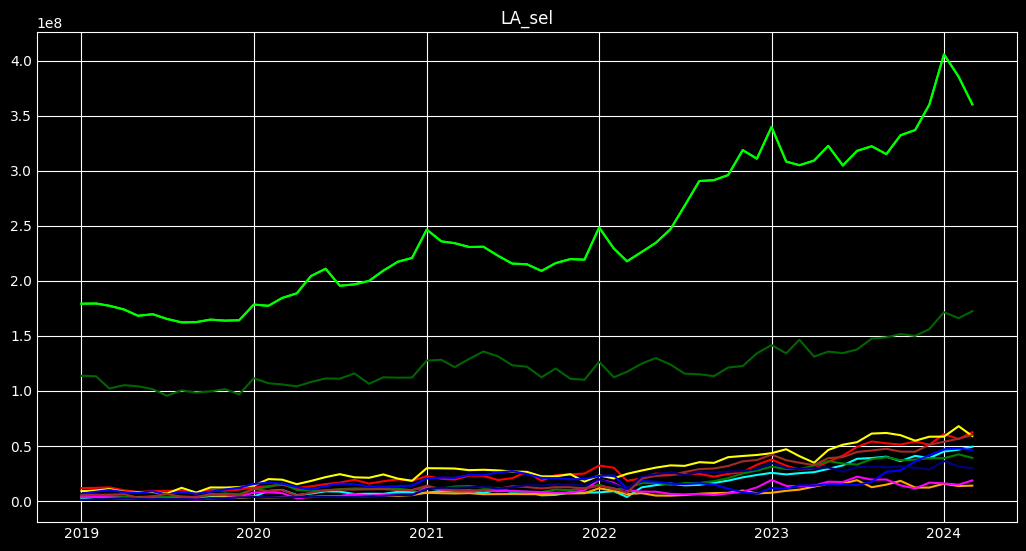

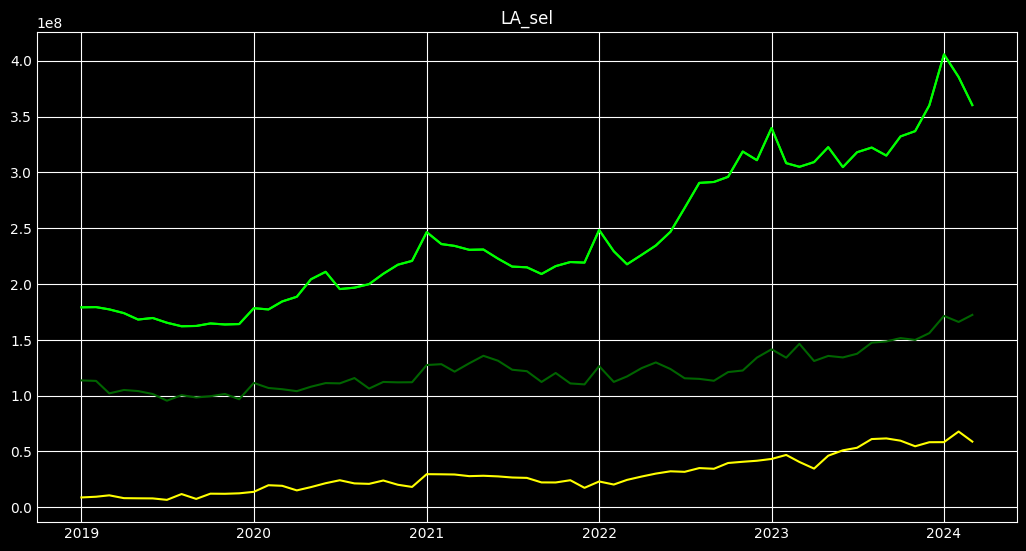

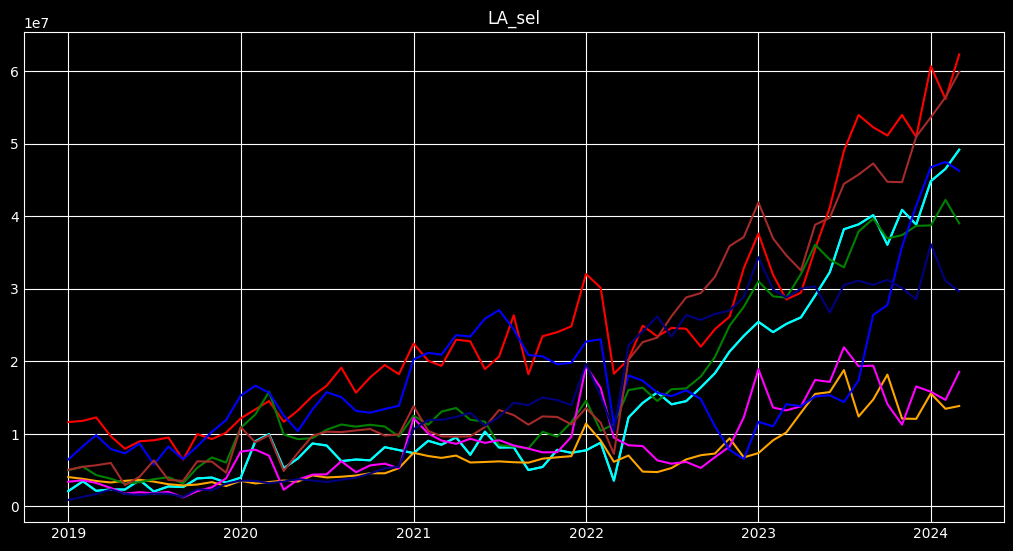

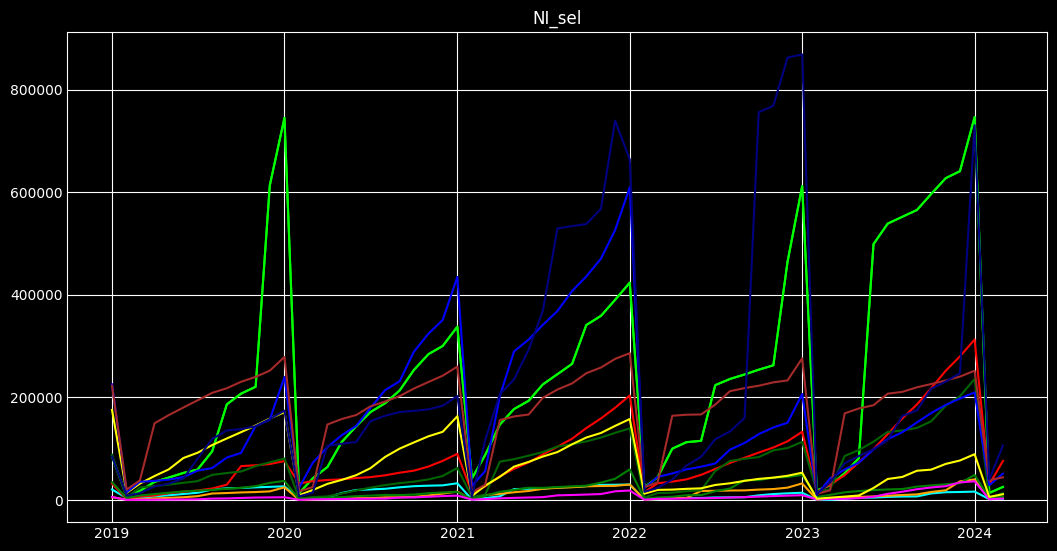

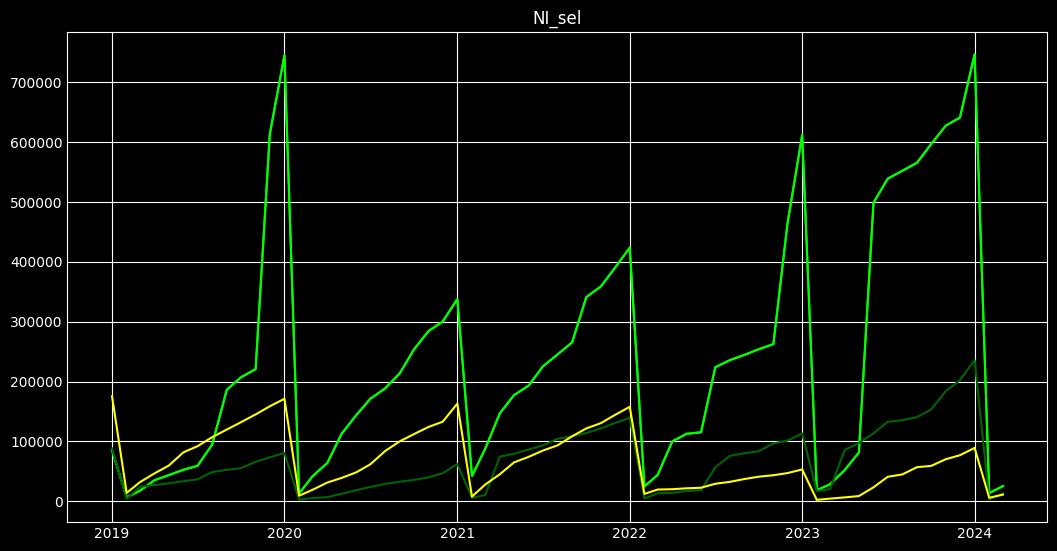

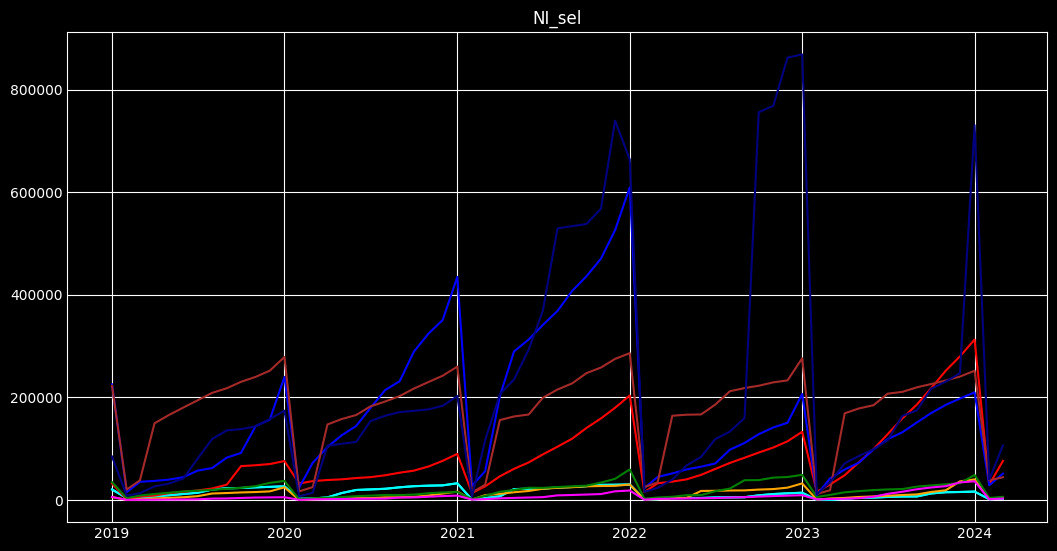

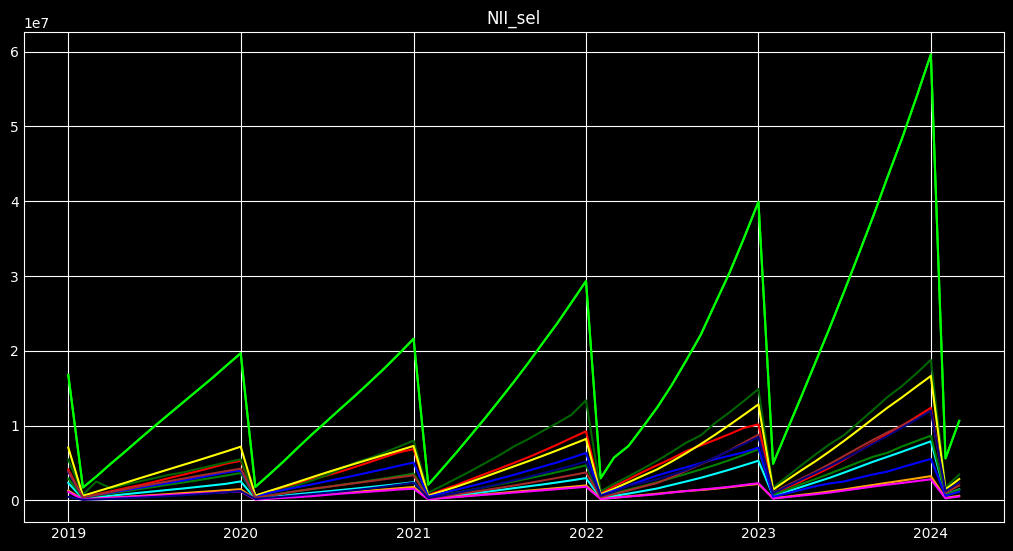

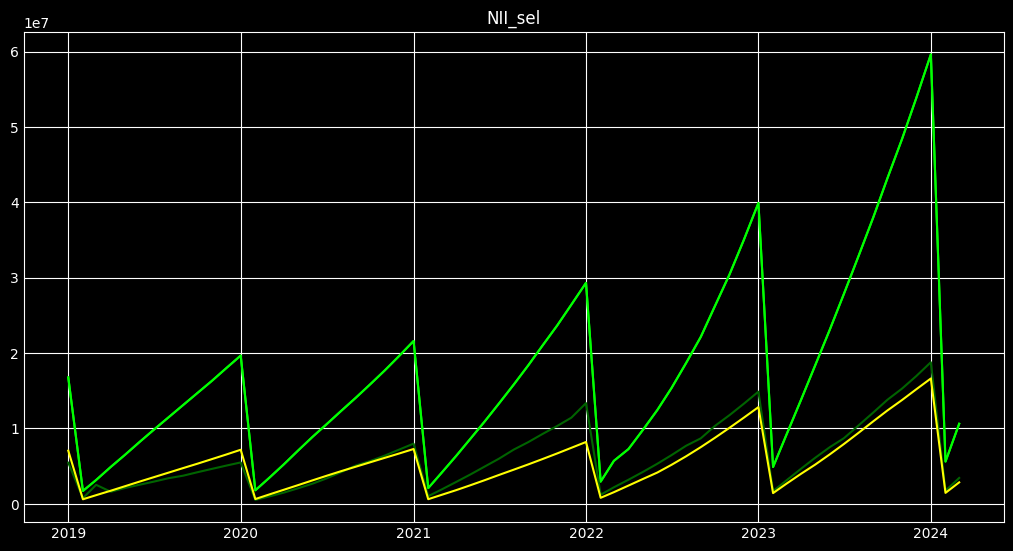

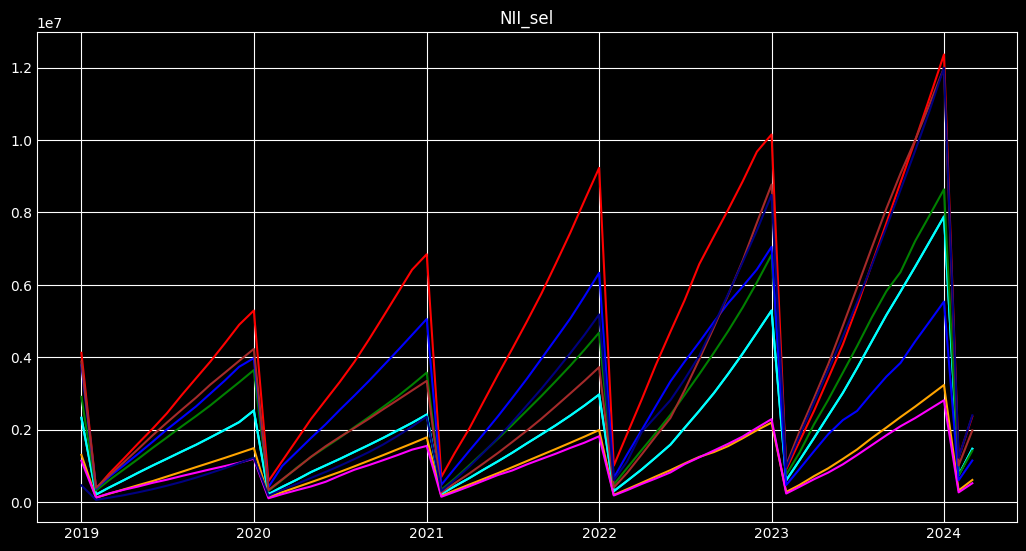

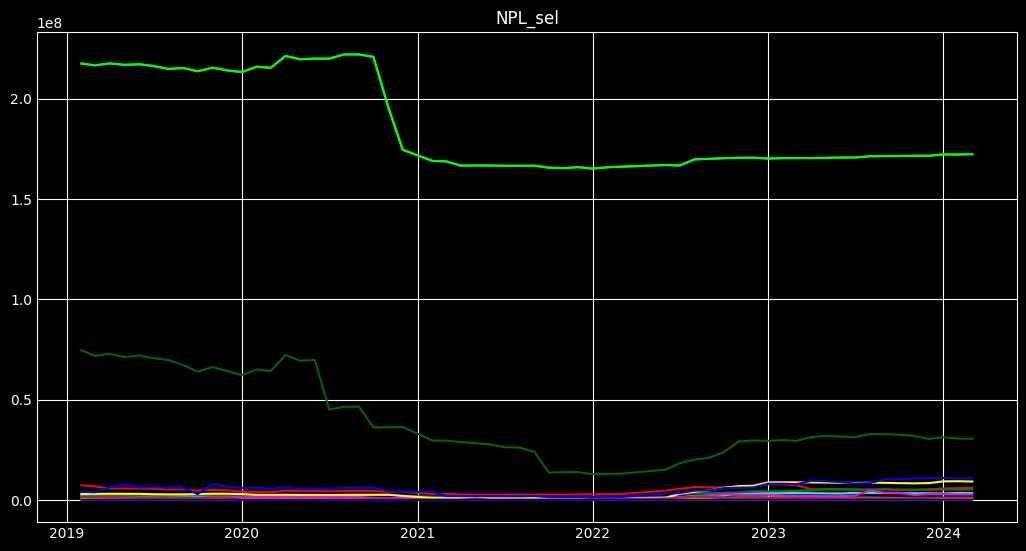

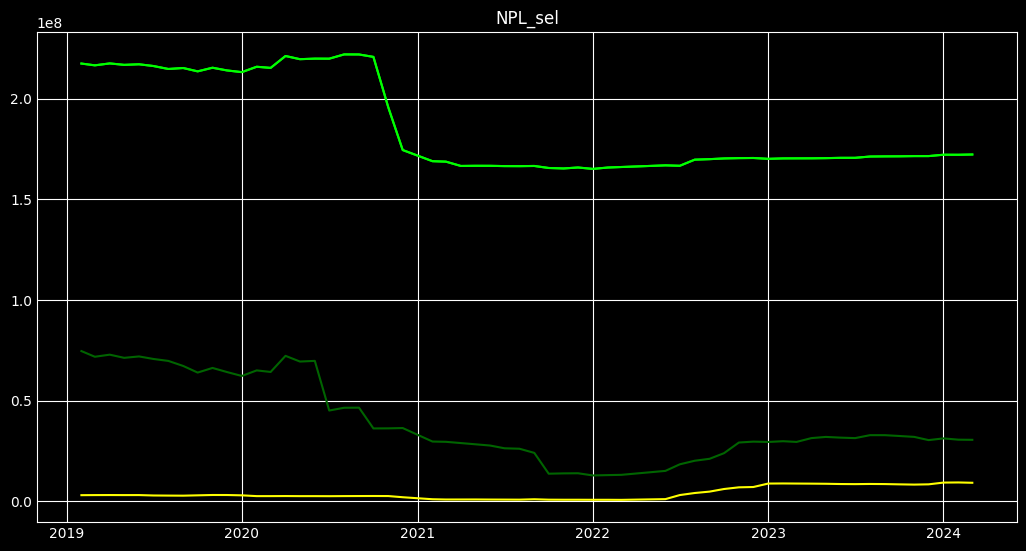

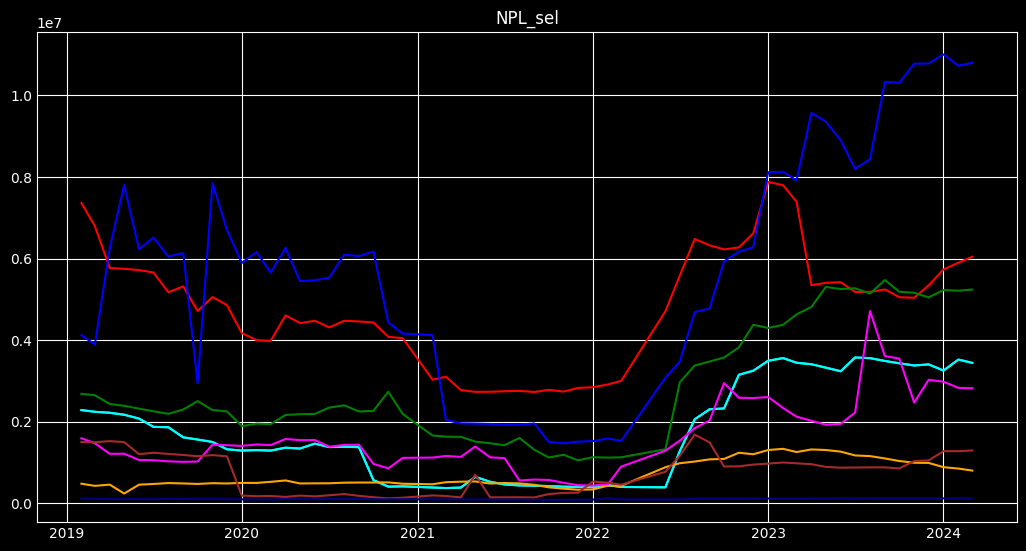

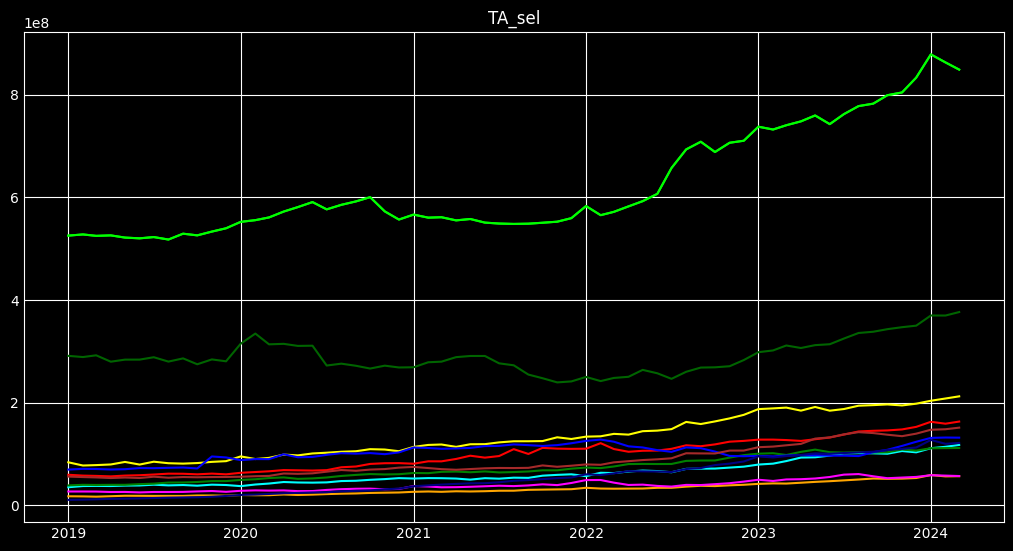

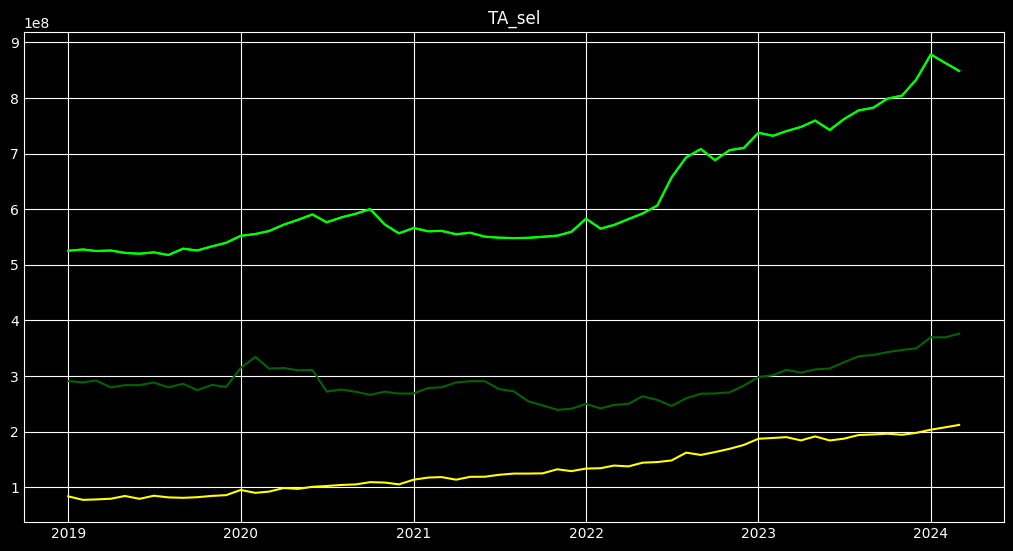

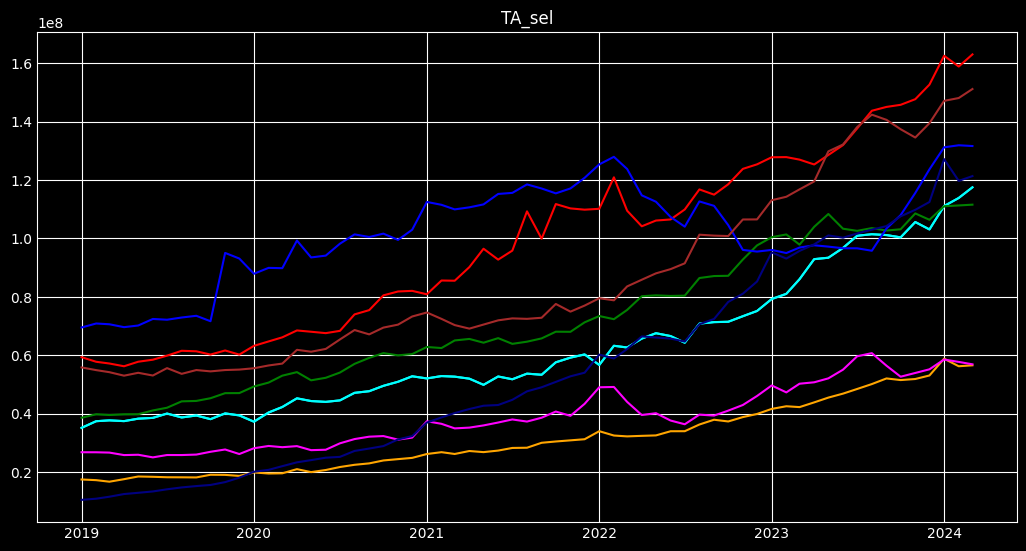

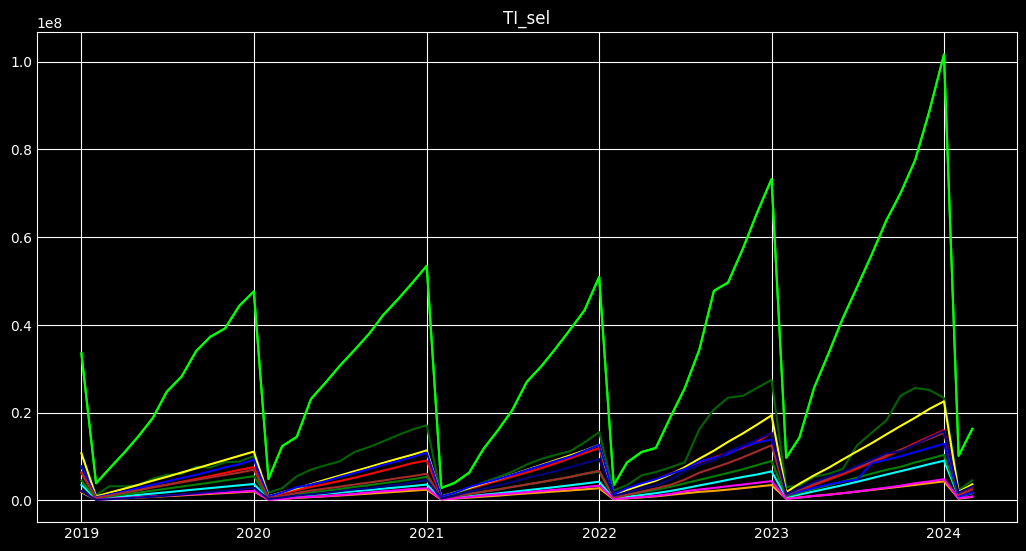

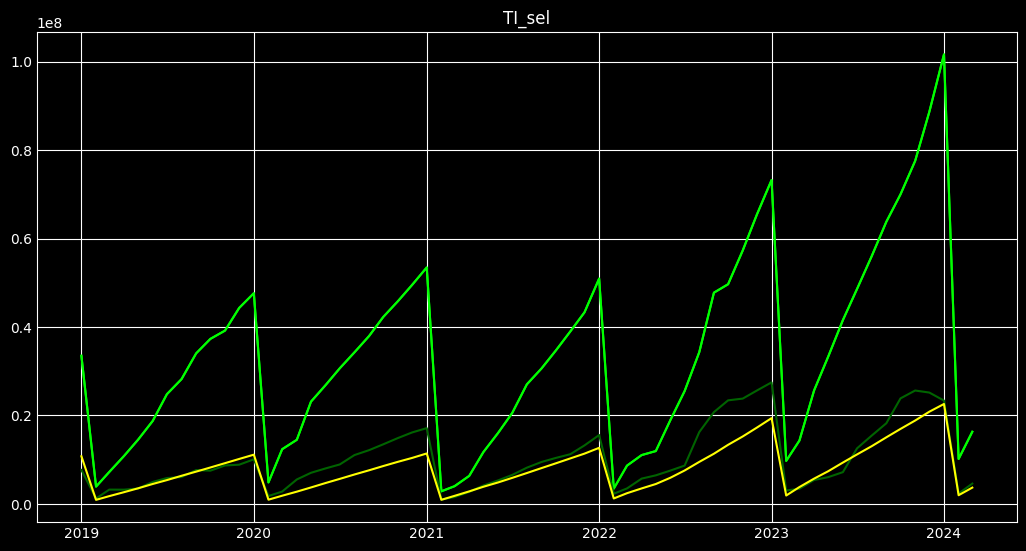

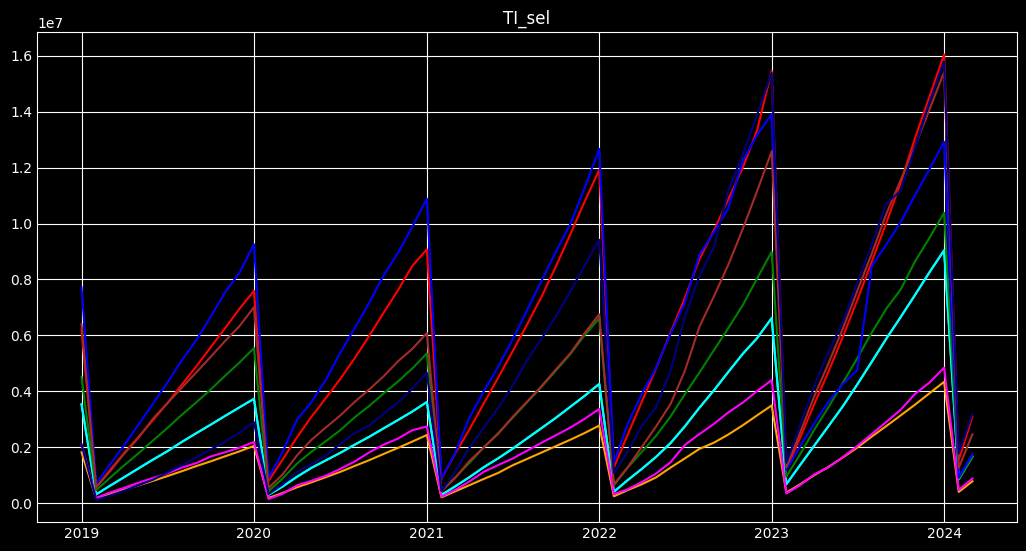

In [ ]:
def plot_file(name, sel_banks):
    df=pd.read_csv('selected_banks/'+name)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    plt.figure(figsize=(10, 5))
    plt.style.use('_mpl-gallery')
    plt.title(os.path.splitext(name)[0])
    plt.plot(df.index, df[sel_banks[0][0]], color=sel_banks[0][1])
    for bank in sel_banks:
        plt.plot(df[bank[0]], color = bank[1])
    plt.show()
    
all_banks = [['cb privatbank', 'lime'], ['credit agricole bank', 'cyan'], ['fuib','red'], ['kredobank', 'orange'], ['oschadbank', 'darkgreen'], ['otp bank', 'green'], ['pivdennyi bank', 'magenta'], ['raiffeisen bank', 'yellow'], ['sense bank', 'blue'], ['ukrsibbank', 'brown'], ['universal bank', 'navy']]
top_banks = [['cb privatbank', 'lime'], ['oschadbank', 'darkgreen'], ['raiffeisen bank', 'yellow']]
lower_banks = [['credit agricole bank', 'cyan'], ['fuib','red'], ['kredobank', 'orange'], ['otp bank', 'green'], ['pivdennyi bank', 'magenta'], ['sense bank', 'blue'], ['ukrsibbank', 'brown'], ['universal bank', 'navy']]

for files in ['AE_sel.csv', 'C_sel.csv', 'CL_sel.csv', 'D_sel.csv', 'L_sel.csv', 'LA_sel.csv', 'NI_sel.csv', 'NII_sel.csv','NPL_sel.csv', 'TA_sel.csv', 'TI_sel.csv']:
    plot_file(files, all_banks)
    plot_file(files, top_banks)
    plot_file(files, lower_banks)


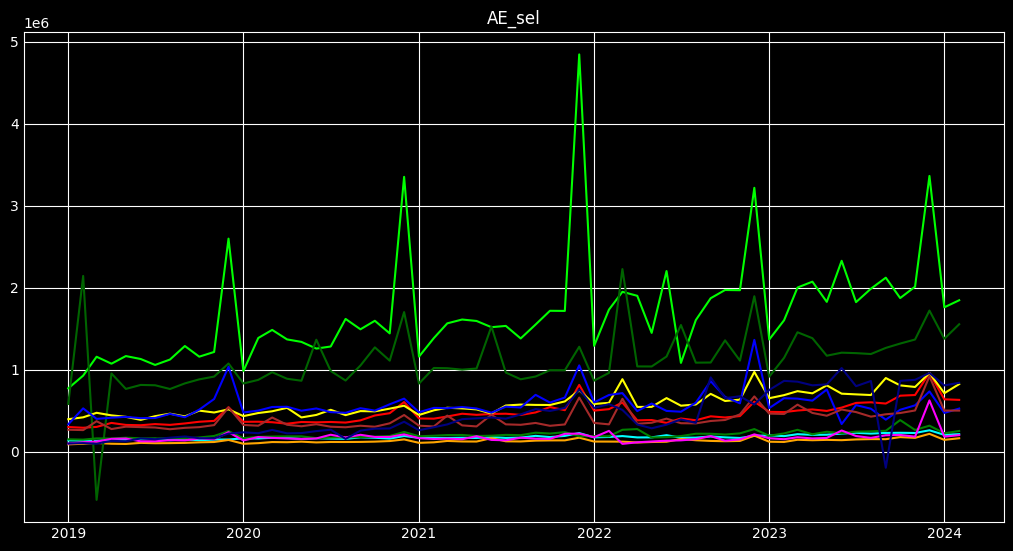

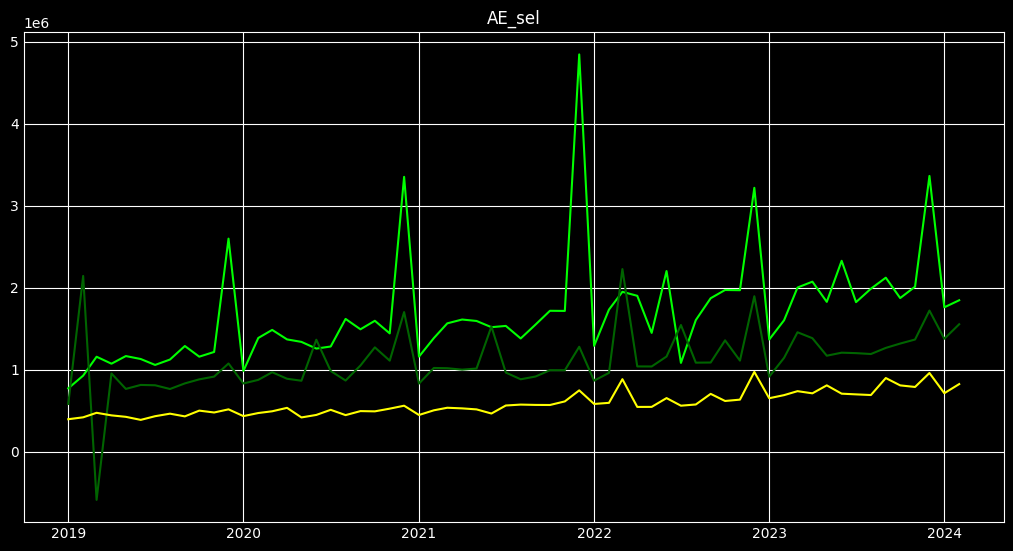

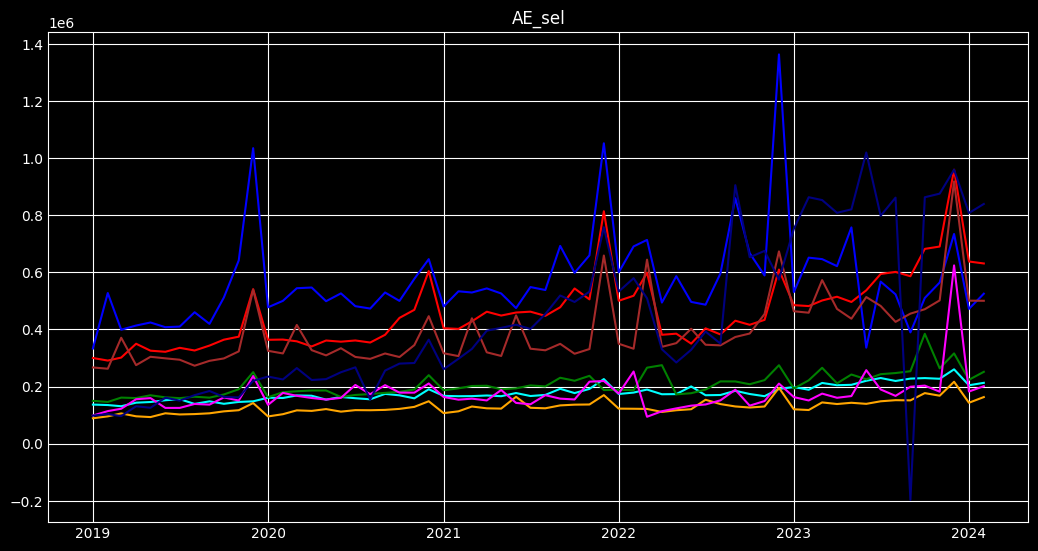

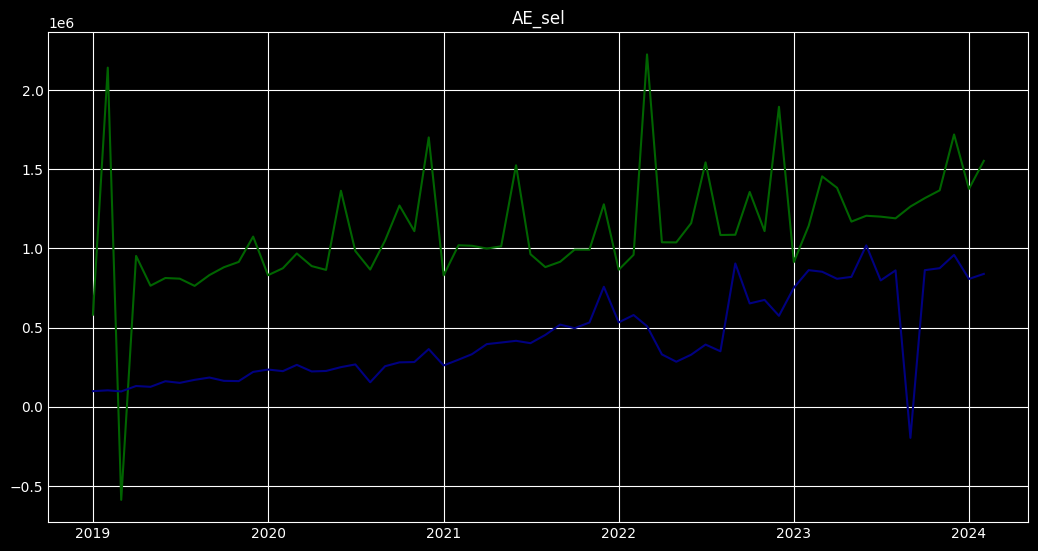

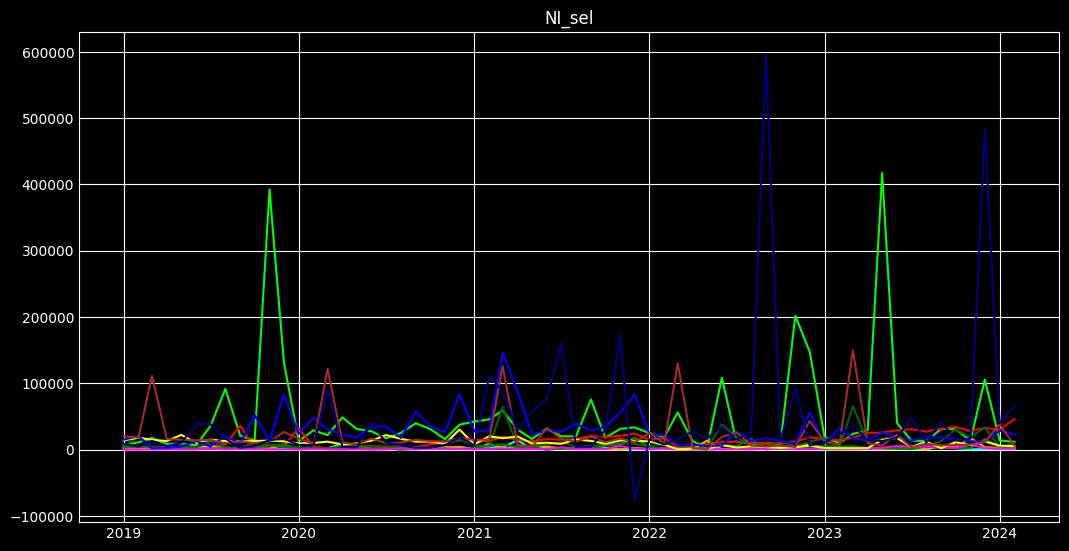

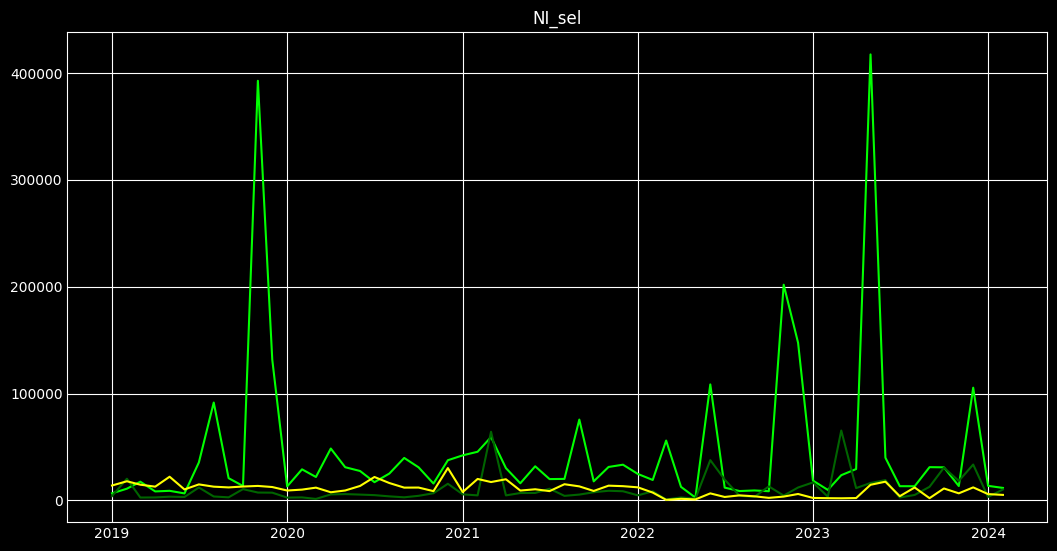

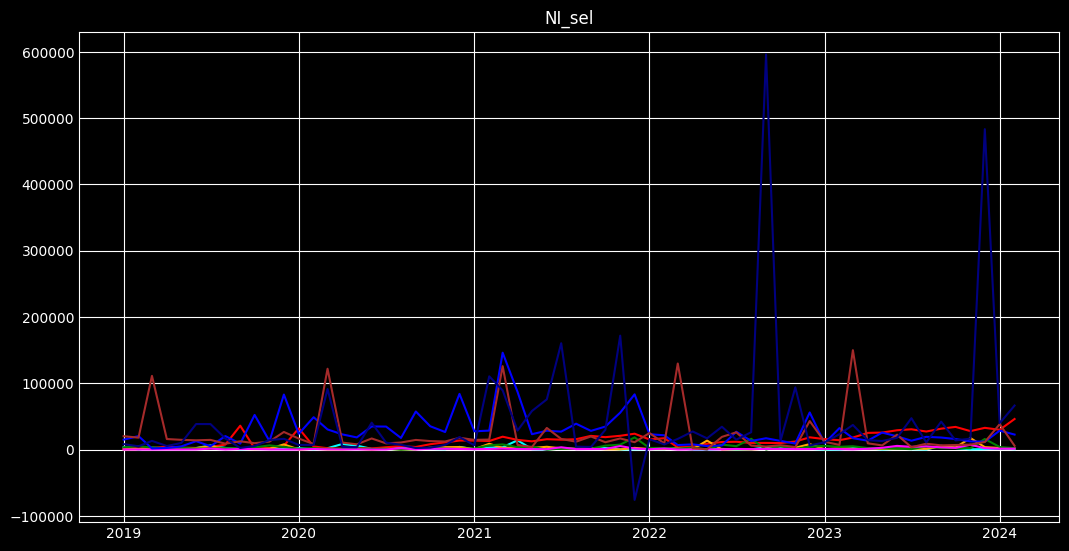

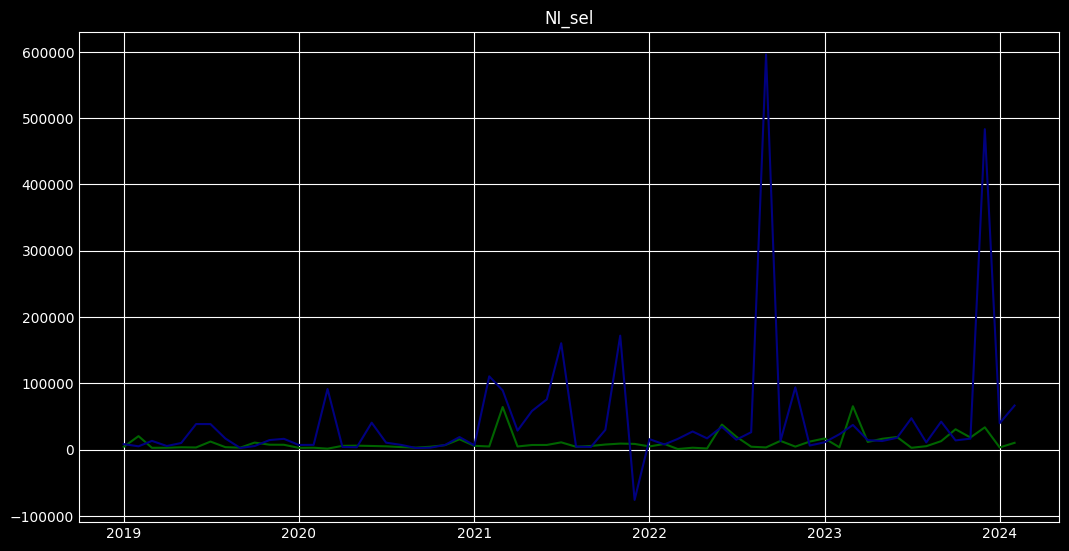

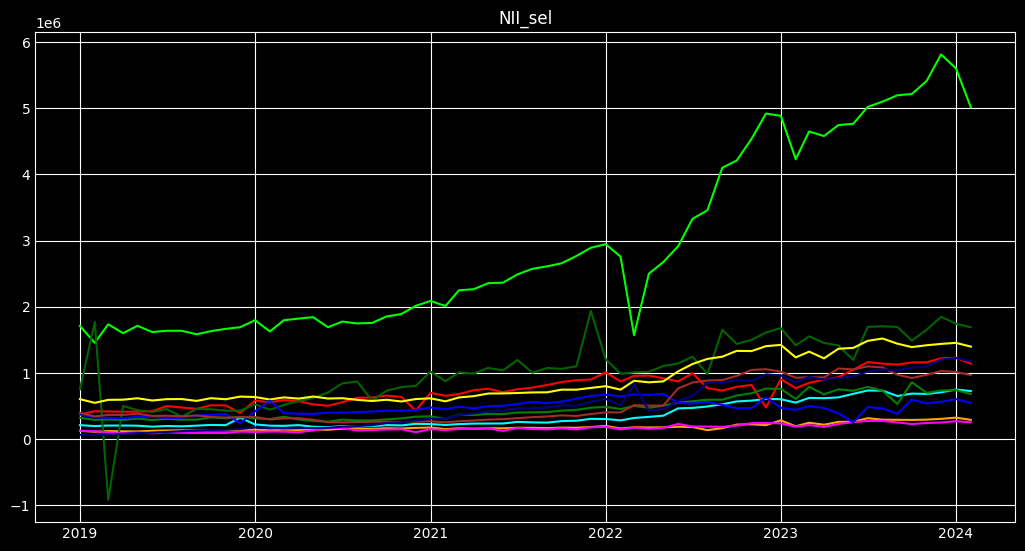

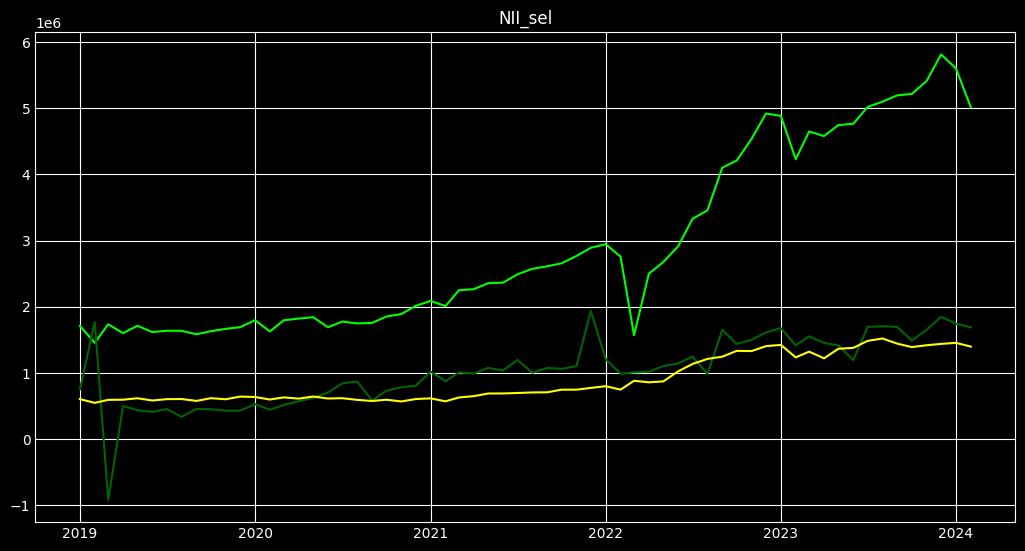

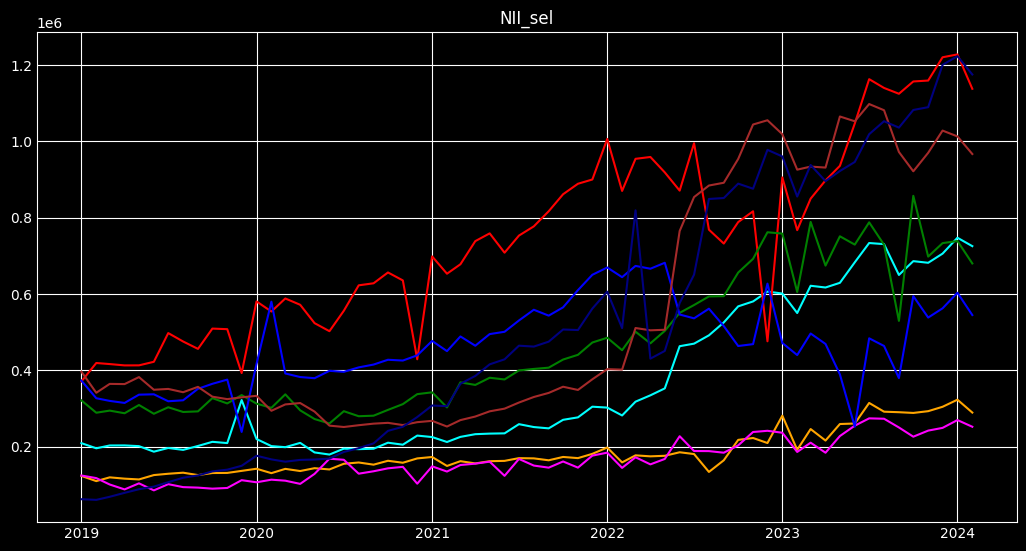

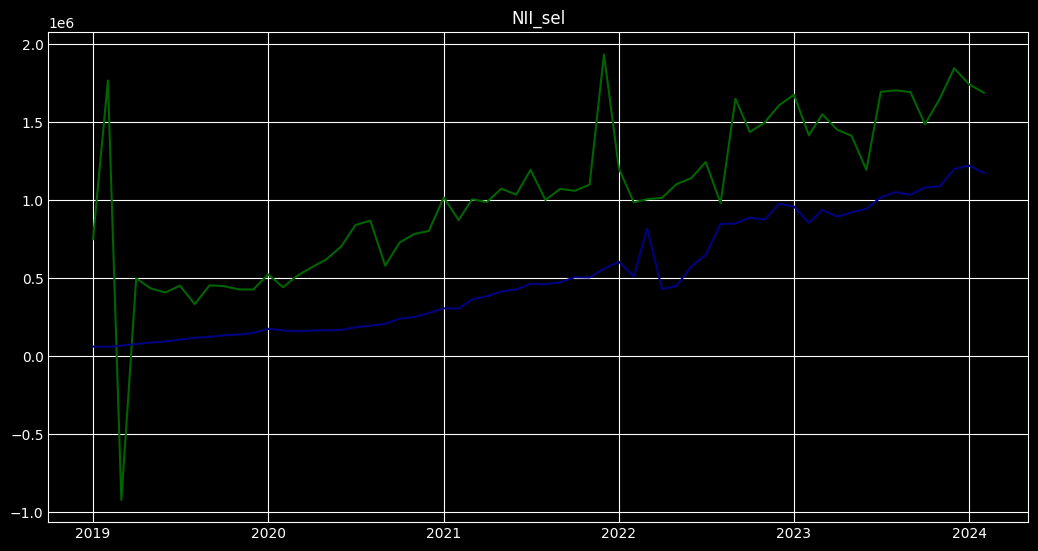

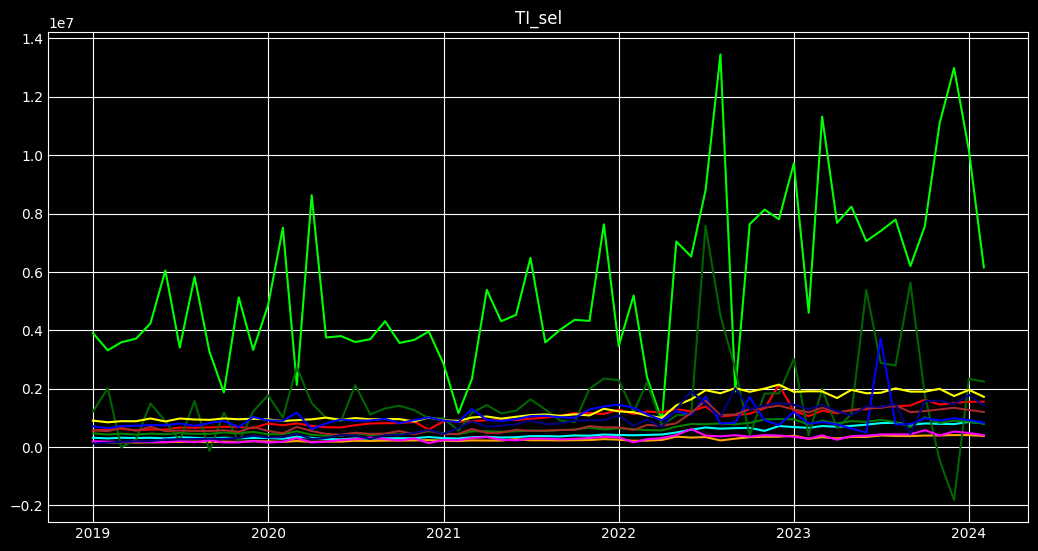

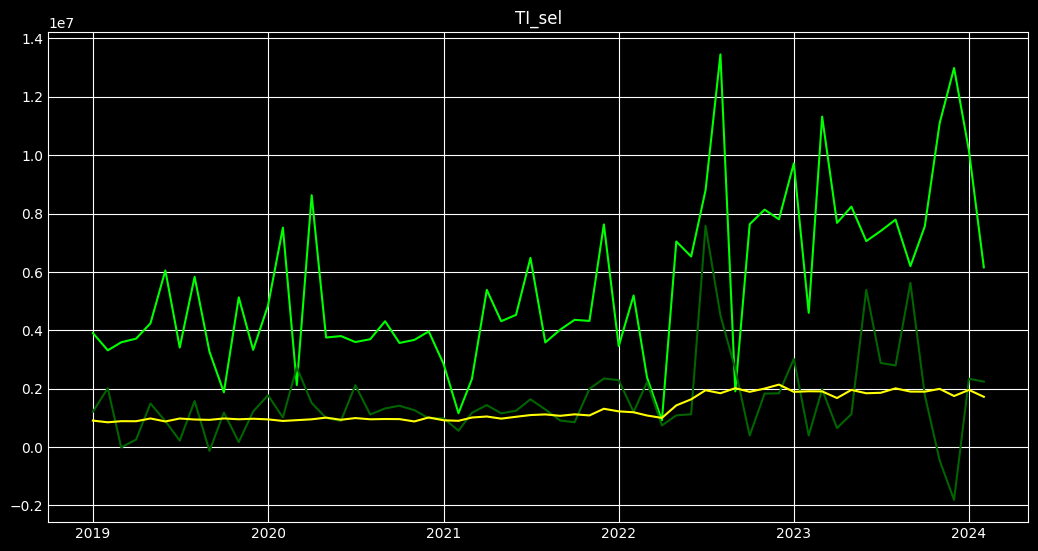

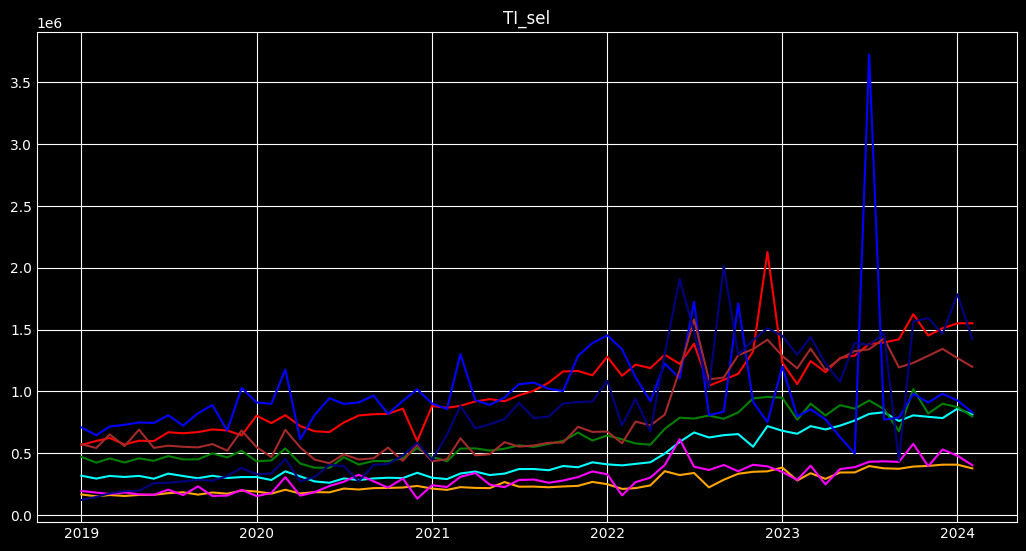

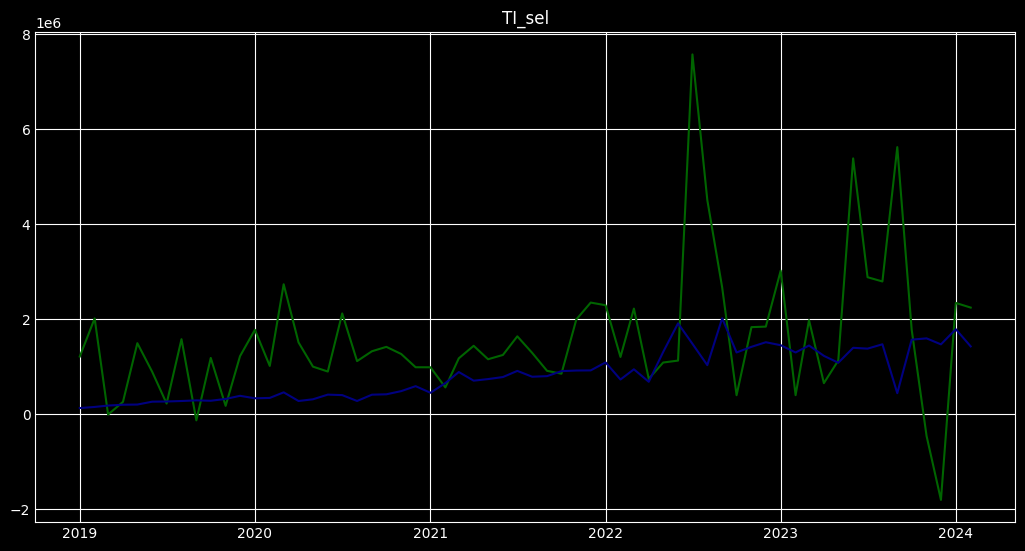

In [31]:
def remove_rolling_sum(file, bank_list):
    df=pd.read_csv('selected_banks/'+file)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    plt.figure(figsize=(10, 5))
    plt.title(os.path.splitext(file)[0])
    for bank in bank_list:
        differ = []
        years = []
        bank_name = bank[0]
        for i in range(1,len(df[bank_name])):
            years.append(df.index[i-1])
            if i%12==1:
                differ.append(df[bank_name][i])
            else:
                differ.append(df[bank_name][i]-df[bank_name][i-1])
        df[bank[0]]=differ + [0]
        plt.plot(years, differ, color = bank[1])
    # df = df.iloc[:-1]
    # file_name, file_extension = os.path.splitext(file)
    # output_file = 'norollsum/' + file_name + file_extension
    # df.to_csv(output_file)
for files in ['AE_sel.csv', 'NI_sel.csv', 'NII_sel.csv','TI_sel.csv']:
    remove_rolling_sum(files, all_banks)
    remove_rolling_sum(files, top_banks)
    remove_rolling_sum(files, lower_banks)
    remove_rolling_sum(files, [['oschadbank', 'darkgreen'], ['universal bank', 'navy']])

warnings.simplefilter(action='ignore')
